<a href="https://colab.research.google.com/github/AnDoan170/stock-volatility/blob/main/STOCK_PRICE_VOLATILITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**_TABLE OF CONTENTS_**
-  [**1. INTRODUCTION**](#1)
-  [**2. LOAD LIBRARIES AND DATASETS**](#2)
     - [*2.1. Load libraries*](#2.1)
     - [*2.2. List companies with listed stocks*](#2.2)
     - [*2.3. Retrieve stock price history*](#2.3)
     - [*2.4. Financial indicators*](#2.4)
     - [*2.5. Financial report*](#2.5)
     - [*2.6. Load datasets*](#2.6)
        * [**_2.6.1. Load stock data_**](#2.6.1)
        * [**_2.6.2. Load metrics from financial report_**](#2.6.2)
-  [**3. DATA WRANGLING AND CLEANING**](#3)
    - [*3.1. Dataframe `stocks`*](#3.1)
        * [**_3.1.1. Null values_**](#3.1.1)
        * [**_3.1.2. Duplicated values_**](#3.1.2)
    - [*3.2. Dataframe `bank_metrics`*](#3.2)
        * [**_3.2.1. Split into two datasets_**](#3.2.1)
        * [**_3.2.2. Cleaning missing values_**](#3.2.2)
        * [**_3.2.3. Duplicate values_**](#3.2.3)
-  [**4. DATA ANALYSIS AND VISUALIZATION**](#4)
     - [*4.1. Visualizing stock data*](#4.1)
          * [**_4.1.1. Visualizing close price_**](#4.1.1)
          * [**_4.1.2. Visualizing stock volume_**](#4.1.2)
          * [**_4.1.3. Visualizing moving averages_**](#4.1.3)
     - [*4.2. Visualizing bank_metrics data*](#4.2)
          * [**_4.2.1. Visualizing revenue_**](#4.2.1)
          * [**_4.2.2. Visualizing total asset, total liabilities, total equity of 6 banks_**](#4.2.2)
          * [**_4.2.3. Visualizing total cash stored_**](#4.2.3)
          * [**_4.2.4. Visualizing operation expenses_**](#4.2.4)
          * [**_4.2.5. Visualizing ROA and ROE_**](#4.2.5)
          * [**_4.2.6. Visualizing EPS_**](#4.2.6)
          * [**_4.2.7. Heatmap_**](#4.2.7)
-  [**5. LINEAR REGRESSION MODEL IMPLEMENTATION**](#5)
    - [*5.1. Preparing the data*](#5.1)
    - [*5.2. Linear Regression model training*](#5.2)
    - [*5.3. Model evaluation*](#5.3)
        * [**_5.3.1. Metrics_**](#5.3.1)
        * [**_5.3.2. Actual vs predicted plot_**](#5.3.2)
        * [**_5.3.3. Residuals plot_**](#5.3.3)
    - [*5.4. Plotting actual line vs predicted line*](#5.4)
-  [**6. LSTM MODEL IMPLEMENTATION**](#6)
-  [**7. CONCLUSION**](#7)
-  [**8. REFERENCES**](#8)

# <a class = "anchor" id = "1">**INTRODUCTION**</a>

Vietnam is currently one of the countries with the fastest economic growth in Asia in particular and the world in general. Specifically, from 2011 until now (except 2020 and 2021 due to the impact of the Covid-19 epidemic), Vietnam's GDP growth rate has always been above 5%. Vietnam is also a member of major organizations/forums in the world such as the United Nations, World Trade Organization, International Monetary Fund, ...

Talking about the Vietnamese stock market, the Vietnamese stock market has developed strongly in the period 2011 - 2020, with the scale of capital mobilization through the stock market reaching nearly 2.9 million billion VND, nearly 10 times higher than the period 2000 - 2010. The stock market has provided very good support for the equitization of state-owned enterprises and, together with the bank's credit system, has created a Vietnamese capital market structure. South is more efficient, more balanced, supporting the development of the entire economy. (The Role of the Stock Market in Vietnam's Economy, n.d.). In addition, at 8pm on August 15 (Vietnam time), more than 2.3 billion common shares of billionaire Pham Nhat Vuong's VinFast automobile company were officially listed on the US stock exchange Nasdaq with the trading code VFS translation (VietNamNet News, n.d.).

[//]: # "Write more about Vietnam's stock market to reference"

In this report, we will get data on the stock exchange of companies listed in the VN30 group.

# <a class = "anchor" id = "2">**LOAD LIBRARIES AND DATASETS**</a>

## <a class = "anchor" id = "2.1">*Load libraries*</a>

First, we will choose a library so we can load financial and stock data of companies in the VN30 basket. A brief introduction, `vnstock` is a Python library designed to download Vietnamese stock data easily and for free. The library package is designed based on the principles of simplicity and convenience, most functions can be run immediately on Google Colab when installing `vnstock` without requiring additional dependency packages.

To start using `vnstock`, use the following simple installation command on Google Colab or Command Prompt/Terminal.

In [ ]:
!pip install --upgrade vnstock
!pip install yellowbrick

Next, we will import the `vnstock` library along with other necessary libraries for later uses.

In [ ]:
from vnstock import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Now, we will take a look at the functions in the `vnstock` library. For more information, click on this link:
[VNStock demo notebook](https://colab.research.google.com/github/thinh-vu/vnstock/blob/beta/docs/gen2_vnstock_demo_index_all_functions_testing_2023.ipynb)

## <a class = "anchor" id = "2.2">*List companies with listed stocks*</a>

First, we will take a quick look at companies in Vietnam using the function `listing_companies(live = True, source = 'SSI')`, in which:
- The `live` parameter takes one of two values.
     - `live = False`: Allow reading local data from the attached listing_companies csv file on Github by default. This file is updated monthly. Contains very detailed information. Because the list of listed companies usually does not change continuously, this does not cause much of an obstacle.
     - `live = True`: Allows reading real-time updated listed company list data from the free API provided by Wifeed. The data returned in this case only includes 4 basic information: stock code, company name, company classification code, listing exchange.

- The source parameter takes on one of two values: `Wifeed` (default) or `SSI`. Omit this parameter if using `live = True`. The addition of the `SSI` data source allows users to easily find the company code to reference some `SSI` functions when using the stock code does not yield results.

In [ ]:
listing_companies(live = True, source = 'SSI')

Total number of companies:  1608


organCode ticker comGroupCode icbCode organTypeCode comTypeCode  \
0     0104498100    VVS   UpcomIndex    3353            DN          CT   
1     0109204756    HIO   UpcomIndex    7535            DN          CT   
2     0313140100    SBG      VNINDEX    2727            DN          CT   
3     0700519785    THM   UpcomIndex    3763            DN          CT   
4          10659    HSV   UpcomIndex    1757            DN          CT   
...          ...    ...          ...     ...           ...         ...   
1603  XUANMINHHP    XMP   UpcomIndex    7535            DN          CT   
1604         YBC    YBC   UpcomIndex    2353            DN          CT   
1605        YBMC    YBM      VNINDEX    1775            DN          CT   
1606     YEGCORP    YEG      VNINDEX    5553            DN          CT   
1607       YTECO    YTC   UpcomIndex    4537            DN          CT   

                                              organName  \
0        Công ty Cổ phần Đầu tư Phát triển Máy Việt Nam   
1                          Công ty Cổ Phần Helio Energy   
2     Công ty Cổ Phần Tập Đoàn Cơ Khí Công Nghệ Cao ...   
3                         Công ty Cổ phần Tứ Hải Hà Nam   
4                 Công ty Cổ phần Tập đoàn HSV Việt Nam   
...                                                 ...   
1603                Công ty Cổ phần Thủy điện Xuân Minh   
1604      Công ty Cổ phần Xi măng và Khoáng sản Yên Bái   
1605     Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái   
1606                     Công ty Cổ phần Tập đoàn Yeah1   
1607  Công ty Cổ phần Xuất nhập khẩu Y tế Thành phố ...   

                          organShortName  
0         Đầu tư Phát triển Máy Việt Nam  
1                           Helio Energy  
2     Tập Đoàn Cơ Khí Công Nghệ Cao Siba  
3                          Tứ Hải Hà Nam  
4                       Gang Thép Hà Nội  
...                                  ...  
1603                 Thủy điện Xuân Minh  
1604       Xi măng và Khoáng sản Yên Bái  
1605               Khoáng sản CN Yên Bái  
1606                      Tập đoàn Yeah1  
1607                     XNK Y tế TP.HCM  

[1608 rows x 8 columns]

The number of data points in the DataFrame listed by the `listing_companies` function is 1605, which proves that there are 1605 companies listed on different stock exchanges in Vietnam. Specifically, we will see that the columns have the following meanings:
- `organCode`: company's stock code
- `ticker`: a report of the price of certain securities, updated continuously throughout the trading session by the various stock market exchanges. Simply put, this is the abbreviation code that represents that company's stock
- `comGroupCode`: is the stock index used by the listed company, for example: UpcomIndex, VNINDEX, HNXIndex
- `icbCode`: is an industry classification system developed by Dow Jones and FTSE, developed and applied since 2006 with 10 large industry groups, 19 industry groups, 41 industries and 114 small sub-sectors. (DauThau.info - Super software for analysis and bid hunting, n.d.)
- `organTypeCode`: includes DN (Enterprise) and other (the rest)
- `comTypeCode`: business type, inclusive
     * `CT`: joint stock company
     * `QU`: fund
     * `NH`: bank
     * `Insurance`: insurance company
     * `CK`: securities company
- `organName`: Full name of the organization
- `organShortName`: Shortened name (commonly known) of the organization/company

Now, we will filter companies of the banking type and use the VNINDEX index.

In [ ]:
listing_companies(live = True, source = 'SSI').loc[
     (listing_companies(live = True, source = 'SSI')['comTypeCode'] == 'NH') &
     (listing_companies(live = True, source = 'SSI')['comGroupCode'] == 'VNINDEX')
]

Total number of companies:  1608
Total number of companies:  1608
Total number of companies:  1608


organCode ticker comGroupCode icbCode organTypeCode comTypeCode  \
48         ACB    ACB      VNINDEX    8355            DN          NH   
135        BID    BID      VNINDEX    8355            DN          NH   
292        CTG    CTG      VNINDEX    8355            DN          NH   
425        EIB    EIB      VNINDEX    8355            DN          NH   
435       EVNF    EVF      VNINDEX    8773            DN          NH   
543        HDB    HDB      VNINDEX    8355            DN          NH   
761        LVB    LPB      VNINDEX    8355            DN          NH   
765        MBB    MBB      VNINDEX    8355            DN          NH   
800        MSB    MSB      VNINDEX    8355            DN          NH   
882        OCB    OCB      VNINDEX    8355            DN          NH   
1135      SEAB    SSB      VNINDEX    8355            DN          NH   
1160       SHB    SHB      VNINDEX    8355            DN          NH   
1217       STB    STB      VNINDEX    8355            DN          NH   
1250       TCB    TCB      VNINDEX    8355            DN          NH   
1338       TPB    TPB      VNINDEX    8355            DN          NH   
1413       VCB    VCB      VNINDEX    8355            DN          NH   
1455       VIB    VIB      VNINDEX    8355            DN          NH   
1542       VPB    VPB      VNINDEX    8355            DN          NH   

                                              organName         organShortName  
48                  Ngân hàng Thương mại Cổ phần Á Châu                    ACB  
135   Ngân hàng Thương mại Cổ phần Đầu tư và Phát tr...                   BIDV  
292   Ngân hàng Thương mại Cổ phần Công thương Việt Nam             VietinBank  
425   Ngân hàng Thương mại Cổ phần Xuất nhập khẩu Vi...               Eximbank  
435                  Công ty Tài chính Cổ phần Điện Lực     Tài chính Điện lực  
543   Ngân hàng Thương mại Cổ phần Phát Triển Thành ...                 HDBank  
761     Ngân hàng Thương mại Cổ phần Bưu Điện Liên Việt       LienVietPostBank  
765               Ngân hàng Thương mại Cổ phần Quân đội                 MBBank  
800      Ngân hàng Thương mại Cổ phần Hàng Hải Việt Nam               MSB Bank  
882            Ngân hàng Thương mại Cổ phần Phương Đông  Ngân hàng Phương Đông  
1135            Ngân hàng Thương mại Cổ phần Đông Nam Á                SeABank  
1160      Ngân hàng Thương mại Cổ phần Sài Gòn – Hà Nội                    SHB  
1217    Ngân hàng Thương mại Cổ phần Sài Gòn Thương Tín              Sacombank  
1250    Ngân hàng Thương mại Cổ phần Kỹ thương Việt Nam            Techcombank  
1338            Ngân hàng Thương mại Cổ phần Tiên Phong                 TPBank  
1413  Ngân hàng Thương mại Cổ phần Ngoại thương Việt...            Vietcombank  
1455      Ngân hàng Thương mại Cổ phần Quốc tế Việt Nam                VIBBank  
1542  Ngân hàng Thương mại Cổ phần Việt Nam Thịnh Vượng                 VPBank

## <a class = "anchor" id = "2.3">*Retrieve stock price history*</a>

Suppose we want to access the price history of shares of Tan Cang Construction Joint Stock Company, we will use the function `stock_historical_data` with the following parameters:
- `symbol`: ticker of the stock, here is `'XDC'`
- `start_date`: start time to get price
- `end_date`: last time to get price
- `resolution`: stock price over time. Can receive values ​​`1D` (default, 1 day), `'1'` (1 minute), `'3'` (3 minutes), `'5'` (5 minutes), `'15 `` (15 minutes), `'30'` (30 minutes), `'1H'` (hourly).
- `type`:
     - `type = 'stock'`: allows to get price data of the stock code
     - `type = 'index'`: allows to get price data of the index code
     - `type = 'derivative'`: allows to get derivative data
- `beautify = True`: enable rounding of OHLC values ​​by default (multiply by 1000, for example price 32.05 to 32500). `beautify = False`: disable rounding for stocks

In [ ]:
xdc = stock_historical_data(
     symbol = 'XDC',
     start_date = '2018-01-01',
     end_date = '2024-01-31',
     resolution = '1D',
     type = 'stock',
     beautify = False
)
xdc

time  open  high   low  close  volume ticker
0   2022-12-01  16.1  16.1  16.1   16.1     400    XDC
1   2022-12-02  19.3  19.3  19.3   19.3     200    XDC
2   2022-12-05  22.1  22.1  22.1   22.1     100    XDC
3   2022-12-20  18.8  18.8  18.8   18.8     100    XDC
4   2022-12-21  16.0  16.0  16.0   16.0     300    XDC
..         ...   ...   ...   ...    ...     ...    ...
63  2023-12-22  68.0  68.0  68.0   68.0     200    XDC
64  2023-12-25  78.2  78.2  78.2   78.2     400    XDC
65  2023-12-26  66.5  66.5  66.5   66.5     400    XDC
66  2023-12-27  76.4  76.4  76.4   76.4    1400    XDC
67  2023-12-28  76.4  76.4  65.0   65.0     400    XDC

[68 rows x 7 columns]

## <a class = "anchor" id = "2.4">*Financial indicators*</a>

Suppose we want to see common financial indicators such as Return on common equity (ROE), Return on Assets (ROA),... then we will call the function `financial_ratio` and pass in the following parameters:
- `symbol`: ticker of the stock
- `report_range`: is the time period for calculating the above indicators, receiving 2 values ​​`'yearly'` and `'quarterly'`
- `is_all`: has default value of `True` allowing to get index over all periods (year or quarter), `False` allows getting the most recent periods (last 5 years or 10 quarters). This is an optional parameter. If you do not specify it, it will receive the default value of `False`, which shortens the report to get the most recent 5 years or 10 quarters.

We will try to apply it to Yeah1 Group Joint Stock Company, with `ticker = 'YEG'`

In [ ]:
# Load the financial ratios
yeah1 = financial_ratio(symbol = 'YEG', report_range = 'quarterly', is_all = True)
# Transpose the dataframe
yeah1 = yeah1.T
# View the results
yeah1

ticker quarter  year priceToEarning priceToBook valueBeforeEbitda  \
range                                                                       
Q3-2023    YEG      Q3  2023           86.8         1.2             209.7   
Q2-2023    YEG      Q2  2023           48.7         1.2             777.7   
Q1-2023    YEG      Q1  2023           34.7         0.8               NaN   
Q4-2022    YEG      Q4  2022           36.4         0.8            1617.4   
Q3-2022    YEG      Q3  2022            5.0         1.6               NaN   
Q2-2022    YEG      Q2  2022            7.7         1.9              -7.2   
Q1-2022    YEG      Q1  2022           33.6         2.4              -4.3   
Q4-2021    YEG      Q4  2021          116.4         2.2              -1.6   
Q3-2021    YEG      Q3  2021           -5.7         3.2              -3.0   
Q2-2021    YEG      Q2  2021           -9.6         4.0              -3.0   
Q1-2021    YEG      Q1  2021          -39.2         6.2              -4.0   
Q4-2020    YEG      Q4  2020          -17.7         1.6              -5.4   
Q3-2020    YEG      Q3  2020          -10.1         1.5              -6.3   
Q2-2020    YEG      Q2  2020           -5.8         1.6              -4.1   
Q1-2020    YEG      Q1  2020           -4.0         1.5              -4.1   
Q4-2019    YEG      Q4  2019           -3.1         1.1              -5.1   
Q3-2019    YEG      Q3  2019          -11.0         1.6              -6.9   
Q2-2019    YEG      Q2  2019         -156.8         1.7             -99.1   
Q1-2019    YEG      Q1  2019           24.4         2.0              12.7   

           roe    roa daysReceivable daysInventory  ... cashCirculation  \
range                                               ...                   
Q3-2023  0.016  0.012            461            53  ...             346   
Q2-2023  0.024  0.016            286            44  ...             183   
Q1-2023  0.025  0.016            306            63  ...             199   
Q4-2022  0.021  0.014            587            47  ...             497   
Q3-2022  0.388  0.232            285            41  ...             218   
Q2-2022  0.281  0.183            215            26  ...             176   
Q1-2022  0.074   0.05            214            36  ...             196   
Q4-2021  0.019  0.012            201            21  ...             174   
Q3-2021 -0.435 -0.277            147            14  ...             128   
Q2-2021 -0.333 -0.228            133            25  ...             131   
Q1-2021 -0.144 -0.102            169            38  ...             170   
Q4-2020 -0.086 -0.054            186            39  ...             171   
Q3-2020 -0.133 -0.096            215            33  ...             218   
Q2-2020 -0.236 -0.177            265            42  ...             277   
Q1-2020 -0.292 -0.224            274            44  ...             287   
Q4-2019 -0.291 -0.212             69            35  ...              71   
Q3-2019 -0.127 -0.092             58            34  ...              61   
Q2-2019 -0.017  -0.01             61            27  ...              57   
Q1-2019  0.137  0.088             49            39  ...              62   

        revenueOnWorkCapital capexOnFixedAsset revenueOnAsset postTaxOnPreTax  \
range                                                                           
Q3-2023                  0.8            -1.454            0.2             1.9   
Q2-2023                  1.3             4.687            0.2             4.9   
Q1-2023                  1.2            -0.063            0.2             1.0   
Q4-2022                  0.6            -0.057            0.2             0.2   
Q3-2022                  1.3            -0.039            0.4             0.5   
Q2-2022                  1.7             -2.68            0.5             0.8   
Q1-2022                  1.7            -0.192            0.7             1.0   
Q4-2021                  1.8            -0.417            0.8             0.8   
Q3-2

It seems like there are so many columns of data that we haven't been able to decide which index we can get. Therefore, we will view all column names to select what to get.

In [ ]:
yeah1.columns.sort_values()

Index(['assetOnEquity', 'bookValuePerShare', 'bookValuePerShareChange',
       'capexOnFixedAsset', 'capitalBalance', 'cashCirculation',
       'cashOnCapitalize', 'cashOnEquity', 'currentPayment', 'daysInventory',
       'daysPayable', 'daysReceivable', 'debtOnAsset', 'debtOnEbitda',
       'debtOnEquity', 'earningPerShare', 'ebitOnInterest', 'ebitOnRevenue',
       'ebitdaOnStock', 'ebitdaOnStockChange', 'epsChange',
       'equityOnLiability', 'equityOnTotalAsset', 'grossProfitMargin',
       'operatingProfitMargin', 'payableOnEquity', 'postTaxMargin',
       'postTaxOnPreTax', 'preTaxOnEbit', 'priceToBook', 'priceToEarning',
       'quarter', 'quickPayment', 'revenueOnAsset', 'revenueOnWorkCapital',
       'roa', 'roe', 'shortOnLongDebt', 'ticker', 'valueBeforeEbitda', 'year'],
      dtype='object')

It can be seen that there are many financial indicators listed, but we will only choose the most popular financial indicators for analysis, including:
- Return on Assets (ROA)
- Return on Equity (ROE)
- Price to Earnings
- Price to Book
- Earnings per share (EPS)

## <a class = "anchor" id = "2.5">*Financial report*</a>

Next, we will look at a company's financial statements. There are two sources from which you can get financial statement data, one is from SSI, the other is from TCBS. Each data source has 3 reports, including: business report, balance sheet, cash flow report.

If we want to access the financial report using SSI source, which is more detailed than the TCBS shortened version, we use the function `financial_report` with the following parameters:
- `symbol`: stock code you want to analyze
- `report_type`: includes:
     * `IncomeStatement`: business results report
     * `BalanceSheet`: accounting balance report
     * `CashFlow`: cash flow statement
- `frequency`: accepts 1 of 2 values: `Yearly` or `Quarterly`

If we want to access the condensed financial report using the TCBS source, we will use the `financial_flow` function, in which:
- `symbol`: stock code you want to analyze
- `report_type`: includes:
     * `incomestatement`: business results report
     * `balancesheet`: accounting balance report
     * `cashflow`: cash flow statement
- `report_range`: accepts 1 of 2 values: `yearly` or `quarterly`

We will take a demo example of 3 financial statements of Yen Bai Industrial Minerals Joint Stock Company, with `ticker = 'YBM'`

In [ ]:
# Income statement
financial_flow(symbol = 'YBM', report_type = 'incomestatement', report_range = 'yearly')

ticker  revenue  yearRevenueGrowth quarterRevenueGrowth  costOfGoodSold  \
index                                                                           
2022     YBM      429             -0.130                 None            -290   
2021     YBM      493              0.160                 None            -374   
2020     YBM      426             -0.024                 None            -294   
2019     YBM      436              0.360                 None            -310   
2018     YBM      321              0.456                 None            -198   
2017     YBM      220                NaN                 None            -129   

       grossProfit  operationExpense  operationProfit  \
index                                                   
2022           140              -115               25   
2021           119               -87               32   
2020           131               -93               39   
2019           126               -92               34   
2018           122               -77               45   
2017            91               -56               35   

       yearOperationProfitGrowth quarterOperationProfitGrowth  ...  \
index                                                          ...   
2022                      -0.218                         None  ...   
2021                      -0.182                         None  ...   
2020                       0.143                         None  ...   
2019                      -0.246                         None  ...   
2018                       0.288                         None  ...   
2017                         NaN                         None  ...   

       postTaxProfit  shareHolderIncome  yearShareHolderIncomeGrowth  \
index                                                                  
2022              10                 10                       -0.332   
2021              15                 15                        0.112   
2020              13                 13                        0.441   
2019               9                  9                       -0.677   
2018              29                 29                       -0.036   
2017              30                 30                          NaN   

       quarterShareHolderIncomeGrowth  investProfit serviceProfit otherProfit  \
index                                                                           
2022                             None          None          None        None   
2021                             None          None          None        None   
2020                             None          None          None        None   
2019                             None          None          None        None   
2018                             None          None          None        None   
2017                             None          None          None        None   

      provisionExpense operationIncome ebitda  
index                                          
2022              None            None     43  
2021              None            None     49  
2020              None            None     56  
2019              None            None     48  
2018              None            None     52  
2017              None            None     39  

[6 rows x 22 columns]

In [ ]:
# Balance sheet
financial_flow(symbol = 'YBM', report_type = 'balancesheet', report_range = 'yearly')

ticker  shortAsset  cash  shortInvest  shortReceivable  inventory  \
index                                                                     
2022     YBM         206    19            0              102         67   
2021     YBM         216     7            0              161         30   
2020     YBM         210    18            0              116         55   
2019     YBM         236     4            0              126         85   
2018     YBM         240     3            0               91        107   
2017     YBM         151     4            0               88         43   
2016     YBM          32     2            0               17          9   

       longAsset  fixedAsset  asset  debt  ...  oweCentralBank  valuablePaper  \
index                                      ...                                  
2022         205         189    411   236  ...            None           None   
2021         220         204    436   257  ...            None           None   
2020         209         191    419   247  ...            None           None   
2019         223         205    459   301  ...            None           None   
2018         246         209    487   327  ...            None           None   
2017         115          72    266   135  ...            None           None   
2016          56          51     88    42  ...            None           None   

       payableInterest  receivableInterest deposit otherDebt  fund  \
index                                                                
2022              None                None    None         0  None   
2021              None                None    None         0  None   
2020              None                None    None         0  None   
2019              None                None    None         0  None   
2018              None                None    None         1  None   
2017              None                None    None         0  None   
2016              None                None    None         0  None   

      unDistributedIncome minorShareHolderProfit payable  
index                                                     
2022                  0.0                      0     236  
2021                  0.0                      0     257  
2020                  0.0                      0     247  
2019                  0.0                      0     301  
2018                  0.0                      1     327  
2017                  NaN                      1     135  
2016                  NaN                      0      42  

[7 rows x 35 columns]

In [ ]:
# Cash flow statement
financial_flow(symbol = 'YBM', report_type = 'cashflow', report_range = 'yearly')

ticker  investCost  fromInvest  fromFinancial  fromSale  freeCashFlow
index                                                                      
2022     YBM          -3          12            -38        38            19
2021     YBM          -3         -16            -29        35            13
2020     YBM          -3          16            -35        33            20
2019     YBM         -10          -6             -7        14            24
2018     YBM        -110        -130            135        -7           -26
2017     YBM         -73         -97            131       -32            27

## <a class = "anchor" id = "2.6">*Load datasets*</a>

### <a class = "anchor" id = "2.6.1">**_Load stock data_**</a>

In early June 2023, Forbes magazine announced the list of Top 50 best listed enterprises in Vietnam in 2023, in which the banking industry has 6 representatives: Vietcombank, VIB, ACB, MBBank, BIDV and VietinBank (Ha , 2023). In this report, we will use financial data from these 6 banks.

First, we will download data about the stocks of all 6 companies since they were listed (in 2012).

In [ ]:
# Define the name of 6 banks
bank_name = ['Vietcombank', 'VIBBank', 'ACB', 'MBBank', 'BIDV', 'VietinBank']

# Create a dataframe to get the data of banks
banks = listing_companies(live = True, source = 'SSI').loc[
     (listing_companies(live = True, source = 'SSI')['comTypeCode'] == 'NH') &
     (listing_companies(live = True, source = 'SSI')['comGroupCode'] == 'VNINDEX')
]

# Filter DataFrame based on bank_name list
bank_tickers = banks[banks['organShortName'].isin(bank_name)]

# Convert numpy array into lists
bank_tickers = bank_tickers['ticker'].to_list()

# Print the results
print(bank_tickers)

Total number of companies:  1608
Total number of companies:  1608
Total number of companies:  1608
['ACB', 'BID', 'CTG', 'MBB', 'VCB', 'VIB']


In [ ]:
stocks = pd.DataFrame()

# Concatenate 6 stocks of 6 banks into a dataframe called 'stocks'
for ticker in bank_tickers:
     stock = stock_historical_data(
          symbol = ticker, start_date = '2012-01-01', end_date = '2024-01-01', resolution = '1D', type = 'stock', beautify = False
     )
     stocks = pd.concat([stocks, stock])
# Sort the dataframe by column 'time'
stocks = stocks.sort_values('time')

# View the stocks dataframes
print(stocks.head())

# View the basic information
print(stocks.info())

         time   open   high    low  close   volume ticker
0  2012-03-20   4.93   5.03   4.87   4.97   862200    ACB
0  2012-03-20  10.10  10.56  10.10  10.56  1819480    VCB
0  2012-03-20   9.32   9.54   9.32   9.50   539210    CTG
0  2012-03-20   3.41   3.48   3.39   3.48  3748430    MBB
1  2012-03-21   4.95   5.05   4.89   4.99  1608000    ACB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15996 entries, 0 to 1739
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    15996 non-null  object 
 1   open    15996 non-null  float64
 2   high    15996 non-null  float64
 3   low     15996 non-null  float64
 4   close   15996 non-null  float64
 5   volume  15996 non-null  int64  
 6   ticker  15996 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 999.8+ KB
None


### <a class = "anchor" id = "2.6.2">**_Load metrics from financial reports_**</a>

Next, we will use the financial statement data of all 6 banks mentioned above and will select the necessary financial indicators for later calculations.

In [ ]:
# Define the dataframe bank_metrics and three other small dataframes
bank_metrics = pd.DataFrame()
bank_income_statement = pd.DataFrame()
bank_balance_sheet = pd.DataFrame()
bank_finance_ratio = pd.DataFrame()

# Take column names from the income statement, then concatenate into the bank_metrics dataframe
income_statement_col = ['ticker', 'revenue', 'operationExpense']
for ticker in bank_tickers:
     income_statement = financial_flow(
          symbol = ticker, report_type = 'incomestatement', report_range = 'quarterly'
     )
     income_statement = income_statement[income_statement_col]
     bank_income_statement = pd.concat([bank_income_statement, income_statement])

# Take column names from the balance sheet
balance_sheet_col = ['ticker', 'cash', 'asset', 'debt', 'equity']
for ticker in bank_tickers:
     balance_sheet = financial_flow(
          symbol = ticker, report_type = 'balancesheet', report_range = 'quarterly'
     )
     balance_sheet = balance_sheet[balance_sheet_col]
     bank_balance_sheet = pd.concat([bank_balance_sheet, balance_sheet])

# Take columns from the financial_ratio function
finance_ratio = ['ticker', 'roa', 'roe', 'priceToEarning', 'priceToBook', 'earningPerShare']
for ticker in bank_tickers:
     ratio = financial_ratio(
          symbol = ticker, report_range = 'quarterly', is_all = True
     )
     ratio = ratio.T
     ratio = ratio[finance_ratio]
     bank_finance_ratio = pd.concat([bank_finance_ratio, ratio])

# Sort by index
bank_income_statement = bank_income_statement.sort_index()
bank_balance_sheet = bank_balance_sheet.sort_index()
bank_finance_ratio = bank_finance_ratio.sort_index()

In [ ]:
# View the dataframes
bank_balance_sheet

ticker   cash    asset     debt  equity
index                                          
2006-Q3    ACB   1965    38032    36259    1773
2006-Q4    ACB   3846    44875    42866    2009
2007-Q1    ACB   6286    50356    48344    2012
2007-Q2    ACB   7152    58378    54198    4180
2007-Q3    ACB   9094    71126    66582    4544
...        ...    ...      ...      ...     ...
2023-Q3    MBB   3412   815881   724118   91763
2023-Q3    VCB  13914  1731306  1572062  159244
2023-Q3    BID  10731  2132855  2013767  119088
2023-Q3    CTG   9469  1888338  1766333  122005
2023-Q3    ACB   6553   648510   581685   66825

[337 rows x 5 columns]

In [ ]:
bank_income_statement

ticker  revenue  operationExpense
index                                    
2005-Q1    VCB        0                 0
2005-Q2    VCB        0                 0
2005-Q3    VCB        0                 0
2006-Q1    VCB        0                 0
2006-Q2    VCB        0                 0
...        ...      ...               ...
2023-Q3    VIB     4321             -1717
2023-Q3    MBB     9812             -3334
2023-Q3    VCB    12596             -5233
2023-Q3    CTG    13087             -5082
2023-Q3    ACB     6209             -2868

[347 rows x 3 columns]

In [ ]:
bank_finance_ratio

ticker    roa    roe priceToEarning priceToBook earningPerShare
range                                                                  
Q1-2008    ACB  0.024    NaN            NaN         NaN             677
Q1-2009    ACB  0.018  0.299            NaN         NaN             784
Q1-2010    CTG  0.011    NaN            NaN         NaN             532
Q1-2010    VCB  0.021    NaN            NaN         NaN            1282
Q1-2010    ACB  0.015    NaN            NaN         NaN             846
...        ...    ...    ...            ...         ...             ...
Q4-2022    BID  0.009  0.199           10.7         1.9            3191
Q4-2022    VIB  0.026  0.297            4.4         1.2            3338
Q4-2022    VCB  0.019   0.24           12.7         2.7            5348
Q4-2022    CTG   0.01  0.169            7.7         1.2            3148
Q4-2022    MBB  0.026  0.258            4.3         0.9            3352

[307 rows x 6 columns]

In [ ]:
def convert_format(x):
     quarter, year = x.split('-')
     return f'{year}-Q{quarter[-1]}'

# Reset index for bank_finance_ratio
bank_finance_ratio = bank_finance_ratio.reset_index()

# Convert the format of the index
bank_finance_ratio['range'] = bank_finance_ratio['range'].apply(convert_format)

# View the results
bank_finance_ratio

range ticker    roa    roe priceToEarning priceToBook earningPerShare
0    2008-Q1    ACB  0.024    NaN            NaN         NaN             677
1    2009-Q1    ACB  0.018  0.299            NaN         NaN             784
2    2010-Q1    CTG  0.011    NaN            NaN         NaN             532
3    2010-Q1    VCB  0.021    NaN            NaN         NaN            1282
4    2010-Q1    ACB  0.015    NaN            NaN         NaN             846
..       ...    ...    ...    ...            ...         ...             ...
302  2022-Q4    BID  0.009  0.199           10.7         1.9            3191
303  2022-Q4    VIB  0.026  0.297            4.4         1.2            3338
304  2022-Q4    VCB  0.019   0.24           12.7         2.7            5348
305  2022-Q4    CTG   0.01  0.169            7.7         1.2            3148
306  2022-Q4    MBB  0.026  0.258            4.3         0.9            3352

[307 rows x 7 columns]

In [ ]:
# Reset index for the three
bank_income_statement = bank_income_statement.reset_index()
bank_balance_sheet = bank_balance_sheet.reset_index()
bank_finance_ratio.columns = ['index', 'ticker', 'roa', 'roe', 'priceToEarning', 'priceToBook', 'earningPerShare']

# Convert the index columns of each dataframe to datetime format
bank_income_statement['index'] = pd.to_datetime(bank_income_statement['index'])
bank_balance_sheet['index'] = pd.to_datetime(bank_balance_sheet['index'])
bank_finance_ratio['index'] = pd.to_datetime(bank_finance_ratio['index'])

# Merge the three dataframes into the bank_metrics dataframe
bank_metrics = pd.merge(
     bank_income_statement, bank_balance_sheet, how = 'outer')\
     .merge(bank_finance_ratio, on = 'index', how = 'outer')

# Reset the index of the merged dataset
bank_metrics = bank_metrics.set_index('index')

# View the results
bank_metrics

ticker_x  revenue  operationExpense    cash     asset      debt  \
index                                                                        
2005-01-01      VCB      0.0               0.0     NaN       NaN       NaN   
2005-04-01      VCB      0.0               0.0     NaN       NaN       NaN   
2005-07-01      VCB      0.0               0.0     NaN       NaN       NaN   
2006-01-01      VCB      0.0               0.0     NaN       NaN       NaN   
2006-04-01      VCB      0.0               0.0     NaN       NaN       NaN   
...             ...      ...               ...     ...       ...       ...   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   

             equity ticker_y    roa    roe priceToEarning priceToBook  \
index                                                                   
2005-01-01      NaN      NaN    NaN    NaN            NaN         NaN   
2005-04-01      NaN      NaN    NaN    NaN            NaN         NaN   
2005-07-01      NaN      NaN    NaN    NaN            NaN         NaN   
2006-01-01      NaN      NaN    NaN    NaN            NaN         NaN   
2006-04-01      NaN      NaN    NaN    NaN            NaN         NaN   
...             ...      ...    ...    ...            ...         ...   
2023-07-01  66825.0      VIB  0.024  0.267            5.6         1.4   
2023-07-01  66825.0      ACB  0.025  0.243            6.2         1.4   
2023-07-01  66825.0      CTG   0.01   0.16            8.0         1.2   
2023-07-01  66825.0      MBB  0.026  0.239            5.1         1.1   
2023-07-01  66825.0      VCB   0.02  0.234           13.4         2.8   

           earningPerShare  
index                       
2005-01-01             NaN  
2005-04-01             NaN  
2005-07-01             NaN  
2006-01-01             NaN  
2006-04-01             NaN  
...                    ...  
2023-07-01            3499  
2023-07-01            3838  
2023-07-01            3376  
2023-07-01            3667  
2023-07-01            6012  

[1775 rows x 13 columns]

We already have 2 dataframes to use for data analysis. Now, we will proceed with data cleaning.

# <a id = "3">**DATA CLEANING**</a>

## <a class = "anchor" id = "3.1">*Dataframe `stocks`*</a>

Let's start evaluating this set of dataframes by seeing if the following situations exist:

### <a class = "anchor" id = "3.1.1">**_Null values_**</a>

In [ ]:
# Check if there are any null values
stocks.isnull().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64

Through this, we can see that there are no data points containing the `null` values, so we will not need to investigate further.

### <a class = "anchor" id = "3.1.2">**_Duplicate values_**</a>

In [ ]:
stocks.duplicated().sum()

0

Thereby, we can see that no lines overlap with each other, so we will not need to investigate further.

## <a class = "anchor" id = "3.2">*Dataframe `bank_metrics`*</a>

### <a class = "anchor" id = "3.2.1">**_Split into two datasets_**</a>

In [ ]:
bank_metrics1 = bank_metrics[['ticker_x', 'revenue', 'operationExpense', 'cash', 'asset', 'debt', 'equity']]
bank_metrics2 = bank_metrics[['ticker_y', 'roa', 'roe', 'priceToEarning', 'priceToBook', 'earningPerShare']]
print(bank_metrics1)
print(bank_metrics2)

           ticker_x  revenue  operationExpense    cash     asset      debt  \
index                                                                        
2005-01-01      VCB      0.0               0.0     NaN       NaN       NaN   
2005-04-01      VCB      0.0               0.0     NaN       NaN       NaN   
2005-07-01      VCB      0.0               0.0     NaN       NaN       NaN   
2006-01-01      VCB      0.0               0.0     NaN       NaN       NaN   
2006-04-01      VCB      0.0               0.0     NaN       NaN       NaN   
...             ...      ...               ...     ...       ...       ...   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0

### <a class = "anchor" id = "3.2.2">**_Cleaning missing values_**</a>

In [ ]:
print(bank_metrics1.info())
print(bank_metrics2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1775 entries, 2005-01-01 to 2023-07-01
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker_x          1775 non-null   object 
 1   revenue           1769 non-null   float64
 2   operationExpense  1769 non-null   float64
 3   cash              1751 non-null   float64
 4   asset             1751 non-null   float64
 5   debt              1751 non-null   float64
 6   equity            1751 non-null   float64
dtypes: float64(6), object(1)
memory usage: 110.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1775 entries, 2005-01-01 to 2023-07-01
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ticker_y         1761 non-null   object
 1   roa              1761 non-null   object
 2   roe              1623 non-null   object
 3   priceToEarning   1212 non-null   object


Now, let's locate the null rows in dataframe `bank_metrics1`

In [ ]:
bank_metrics1[bank_metrics1.isnull().any(axis = 1)]

ticker_x  revenue  operationExpense    cash     asset      debt  \
index                                                                        
2005-01-01      VCB      0.0               0.0     NaN       NaN       NaN   
2005-04-01      VCB      0.0               0.0     NaN       NaN       NaN   
2005-07-01      VCB      0.0               0.0     NaN       NaN       NaN   
2006-01-01      VCB      0.0               0.0     NaN       NaN       NaN   
2006-04-01      VCB      0.0               0.0     NaN       NaN       NaN   
2006-07-01      VCB      0.0               0.0     NaN       NaN       NaN   
2006-07-01      ACB      NaN               NaN  1965.0   38032.0   36259.0   
2007-01-01      VCB      0.0               0.0     NaN       NaN       NaN   
2007-04-01      VCB      0.0               0.0     NaN       NaN       NaN   
2007-07-01      VCB      0.0               0.0     NaN       NaN       NaN   
2008-04-01      VCB      NaN               NaN  3133.0  192214.0  177375.0   
2008-10-01      CTG      NaN               NaN  1980.0  193590.0  181254.0   
2010-01-01      VIB    313.0            -226.0     NaN       NaN       NaN   
2010-01-01      VIB    313.0            -226.0     NaN       NaN       NaN   
2010-01-01      VIB    313.0            -226.0     NaN       NaN       NaN   
2010-04-01      VIB    461.0            -242.0     NaN       NaN       NaN   
2010-04-01      VIB    461.0            -242.0     NaN       NaN       NaN   
2010-04-01      VIB    461.0            -242.0     NaN       NaN       NaN   
2010-10-01      MBB   1044.0            -598.0     NaN       NaN       NaN   
2010-10-01      MBB   1044.0            -598.0     NaN       NaN       NaN   
2010-10-01      MBB   1044.0            -598.0     NaN       NaN       NaN   
2011-01-01      VIB    738.0            -352.0     NaN       NaN       NaN   
2011-01-01      VIB    738.0            -352.0     NaN       NaN       NaN   
2011-01-01      VIB    738.0            -352.0     NaN       NaN       NaN   
2011-10-01      BID      NaN               NaN  3629.0  405755.0  381158.0   
2011-10-01      BID      NaN               NaN  3629.0  405755.0  381158.0   
2011-10-01      BID      NaN               NaN  3629.0  405755.0  381158.0   
2012-01-01      VIB   1104.0            -494.0     NaN       NaN       NaN   
2012-01-01      VIB   1104.0            -494.0     NaN       NaN       NaN   
2012-01-01      VIB   1104.0            -494.0     NaN       NaN       NaN   

             equity  
index                
2005-01-01      NaN  
2005-04-01      NaN  
2005-07-01      NaN  
2006-01-01      NaN  
2006-04-01      NaN  
2006-07-01      NaN  
2006-07-01   1773.0  
2007-01-01      NaN  
2007-04-01      NaN  
2007-07-01      NaN  
2008-04-01  14748.0  
2008-10-01  12336.0  
2010-01-01      NaN  
2010-01-01      NaN  
2010-01-01      NaN  
2010-04-01      NaN  
2010-04-01      NaN  
2010-04-01      NaN  
2010-10-01      NaN  
2010-10-01      NaN  
2010-10-01      NaN  
2011-01-01      NaN  
2011-01-01      NaN  
2011-01-01      NaN  
2011-10-01  24390.0  
2011-10-01  24390.0  
2011-10-01  24390.0  
2012-01-01      NaN  
2012-01-01      NaN  
2012-01-01      NaN

We realize that the above data is difficult to clean, so we will drop them.

In [ ]:
bank_metrics1 = bank_metrics1.dropna()
bank_metrics1

ticker_x  revenue  operationExpense    cash     asset      debt  \
index                                                                        
2006-10-01      ACB    189.0               0.0  3846.0   44875.0   42866.0   
2007-01-01      ACB    413.0               0.0  6286.0   50356.0   48344.0   
2007-04-01      ACB    467.0               0.0  7152.0   58378.0   54198.0   
2007-07-01      ACB    318.0            -191.0  9094.0   71126.0   66582.0   
2007-10-01      ACB    369.0            -242.0  4927.0   87149.0   79215.0   
...             ...      ...               ...     ...       ...       ...   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   
2023-07-01      ACB   6209.0           -2868.0  6553.0  648510.0  581685.0   

             equity  
index                
2006-10-01   2009.0  
2007-01-01   2012.0  
2007-04-01   4180.0  
2007-07-01   4544.0  
2007-10-01   7934.0  
...             ...  
2023-07-01  66825.0  
2023-07-01  66825.0  
2023-07-01  66825.0  
2023-07-01  66825.0  
2023-07-01  66825.0  

[1745 rows x 7 columns]

After that, we will clean the data in dataframe `bank_metrics2`

In [ ]:
bank_metrics2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1775 entries, 2005-01-01 to 2023-07-01
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ticker_y         1761 non-null   object
 1   roa              1761 non-null   object
 2   roe              1623 non-null   object
 3   priceToEarning   1212 non-null   object
 4   priceToBook      1212 non-null   object
 5   earningPerShare  1761 non-null   object
dtypes: object(6)
memory usage: 97.1+ KB


In [ ]:
bank_metrics2.isnull().sum()

ticker_y            14
roa                 14
roe                152
priceToEarning     563
priceToBook        563
earningPerShare     14
dtype: int64

We will drop null values ​​from the `'roe'` column

In [ ]:
bank_metrics2 = bank_metrics2.dropna(subset = ['roe'])
bank_metrics2

ticker_y    roa    roe priceToEarning priceToBook earningPerShare
index                                                                       
2009-01-01      ACB  0.018  0.299            NaN         NaN             784
2009-01-01      ACB  0.018  0.299            NaN         NaN             784
2009-01-01      ACB  0.018  0.299            NaN         NaN             784
2012-01-01      ACB  0.014  0.277            NaN         NaN            1265
2012-01-01      VCB  0.012  0.121            NaN         NaN            1112
...             ...    ...    ...            ...         ...             ...
2023-07-01      VIB  0.024  0.267            5.6         1.4            3499
2023-07-01      ACB  0.025  0.243            6.2         1.4            3838
2023-07-01      CTG   0.01   0.16            8.0         1.2            3376
2023-07-01      MBB  0.026  0.239            5.1         1.1            3667
2023-07-01      VCB   0.02  0.234           13.4         2.8            6012

[1623 rows x 6 columns]

For the remaining null values, we will replace them with the average of the columns.

In [ ]:
bank_metrics2 = bank_metrics2.fillna(bank_metrics2.mean())
bank_metrics2

<ipython-input-29-dc19141d81f2>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_metrics2 = bank_metrics2.fillna(bank_metrics2.mean())


ticker_y    roa    roe  priceToEarning  priceToBook  \
index                                                            
2009-01-01      ACB  0.018  0.299       12.446535     1.919802   
2009-01-01      ACB  0.018  0.299       12.446535     1.919802   
2009-01-01      ACB  0.018  0.299       12.446535     1.919802   
2012-01-01      ACB  0.014  0.277       12.446535     1.919802   
2012-01-01      VCB  0.012  0.121       12.446535     1.919802   
...             ...    ...    ...             ...          ...   
2023-07-01      VIB  0.024  0.267        5.600000     1.400000   
2023-07-01      ACB  0.025  0.243        6.200000     1.400000   
2023-07-01      CTG  0.010  0.160        8.000000     1.200000   
2023-07-01      MBB  0.026  0.239        5.100000     1.100000   
2023-07-01      VCB  0.020  0.234       13.400000     2.800000   

            earningPerShare  
index                        
2009-01-01              784  
2009-01-01              784  
2009-01-01              784  
2012-01-01             1265  
2012-01-01             1112  
...                     ...  
2023-07-01             3499  
2023-07-01             3838  
2023-07-01             3376  
2023-07-01             3667  
2023-07-01             6012  

[1623 rows x 6 columns]

### <a class = "anchor" id = "3.2.3">**_Duplicate values_**</a>

In [ ]:
# Drop duplicate rows
bank_metrics1 = bank_metrics1.drop_duplicates()
bank_metrics2 = bank_metrics2.drop_duplicates()

In [ ]:
bank_metrics1

ticker_x  revenue  operationExpense     cash      asset       debt  \
index                                                                           
2006-10-01      ACB    189.0               0.0   3846.0    44875.0    42866.0   
2007-01-01      ACB    413.0               0.0   6286.0    50356.0    48344.0   
2007-04-01      ACB    467.0               0.0   7152.0    58378.0    54198.0   
2007-07-01      ACB    318.0            -191.0   9094.0    71126.0    66582.0   
2007-10-01      ACB    369.0            -242.0   4927.0    87149.0    79215.0   
...             ...      ...               ...      ...        ...        ...   
2023-07-01      VIB   4321.0           -1717.0   1546.0   384419.0   348379.0   
2023-07-01      MBB   9812.0           -3334.0   3412.0   815881.0   724118.0   
2023-07-01      VCB  12596.0           -5233.0  13914.0  1731306.0  1572062.0   
2023-07-01      CTG  13087.0           -5082.0   9469.0  1888338.0  1766333.0   
2023-07-01      ACB   6209.0           -2868.0   6553.0   648510.0   581685.0   

              equity  
index                 
2006-10-01    2009.0  
2007-01-01    2012.0  
2007-04-01    4180.0  
2007-07-01    4544.0  
2007-10-01    7934.0  
...              ...  
2023-07-01   36040.0  
2023-07-01   91763.0  
2023-07-01  159244.0  
2023-07-01  122005.0  
2023-07-01   66825.0  

[333 rows x 7 columns]

In [ ]:
bank_metrics2

ticker_y    roa    roe  priceToEarning  priceToBook  \
index                                                            
2009-01-01      ACB  0.018  0.299       12.446535     1.919802   
2012-01-01      ACB  0.014  0.277       12.446535     1.919802   
2012-01-01      VCB  0.012  0.121       12.446535     1.919802   
2012-01-01      CTG  0.017  0.259       12.446535     1.919802   
2012-04-01      MBB  0.020  0.237       12.446535     1.919802   
...             ...    ...    ...             ...          ...   
2023-07-01      VIB  0.024  0.267        5.600000     1.400000   
2023-07-01      ACB  0.025  0.243        6.200000     1.400000   
2023-07-01      CTG  0.010  0.160        8.000000     1.200000   
2023-07-01      MBB  0.026  0.239        5.100000     1.100000   
2023-07-01      VCB  0.020  0.234       13.400000     2.800000   

            earningPerShare  
index                        
2009-01-01              784  
2012-01-01             1265  
2012-01-01             1112  
2012-01-01             1415  
2012-04-01              708  
...                     ...  
2023-07-01             3499  
2023-07-01             3838  
2023-07-01             3376  
2023-07-01             3667  
2023-07-01             6012  

[271 rows x 6 columns]

# <a id = "4">**DATA ANALYSIS AND VISUALIZATION**</a>

## <a class = "anchor" id = "4.1">_Visualizing stock data_</a>

### <a class = "anchor" id = "4.1.1">**_Visualizing close price_**</a>

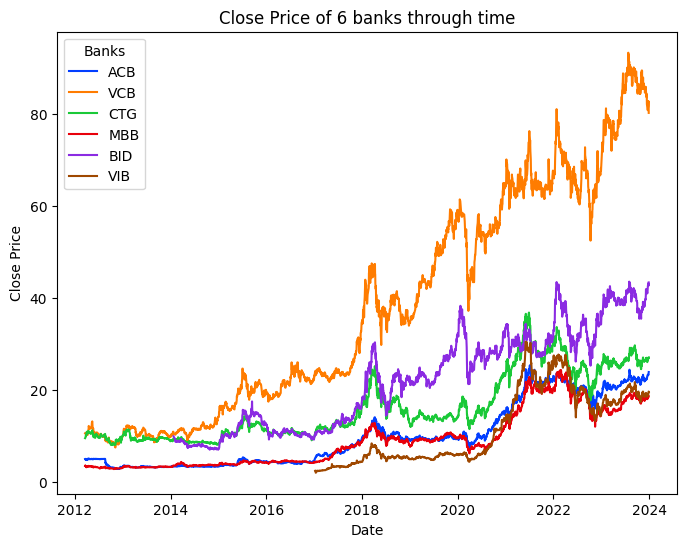

In [ ]:
plt.figure(figsize = (8, 6))
sns.lineplot(x = 'time', y = 'close', data = stocks, hue = 'ticker', palette = 'bright')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price of 6 banks through time')
plt.legend(title = 'Banks')
plt.show()

We can conclude that:
- Vietcombank (VCB) shares have the highest close price from 2012 to the present time.
- During 2014, BIDV's shares initially did not differ too much from the 4 shares of ACB, Vietinbank (CTG), MB Bank (MBB) and VIB Bank, but then increased to close price from 2022. Up to now, it is only ranked behind Vietcombank.
- The remaining stocks are quite similar in pattern.

### <a class = "anchor" id = "4.1.2">**_Visualizing stock volume_**</a>

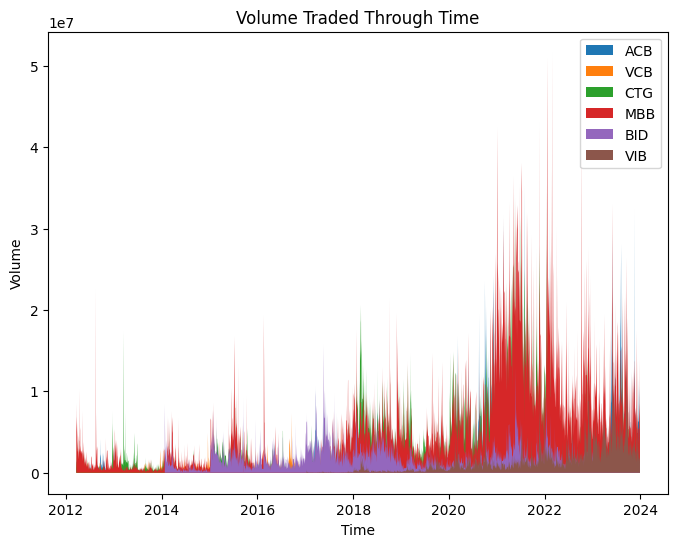

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches((8, 6))

# Loop over each unique value in the 'ticker' column
for ticker in stocks['ticker'].unique():
    # Select the rows for this ticker
    stocks_ticker = stocks[stocks['ticker'] == ticker]
    # Plot the 'volume' column for this ticker
    ax.fill_between(stocks_ticker['time'], stocks_ticker['volume'], label=ticker)

# Set the title and labels
ax.set_title('Volume Traded Through Time')
ax.set_xlabel('Time')
ax.set_ylabel('Volume')

# Add a legend
ax.legend()

# Show the plot
plt.show()

That graph cannot give us insights as it is quite hard-seeing. So, we need to group the data into months and years for better insights.

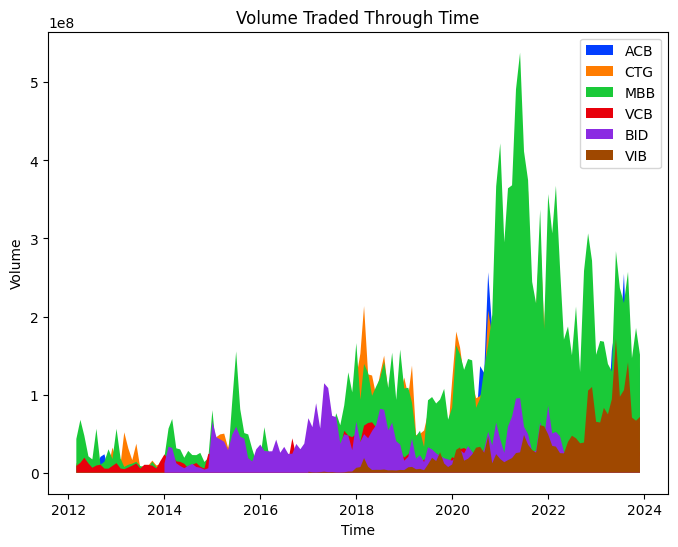

In [ ]:
# Convert the 'time' column to datetime
stocks['time'] = pd.to_datetime(stocks['time'])

# Create a new column for year-month
stocks['year_month'] = stocks['time'].dt.to_period('M')

# Group by 'year_month' and 'ticker', and sum the 'volume'
stocks_grouped = stocks.groupby(['year_month', 'ticker'])['volume'].sum().reset_index()

# Set color palette
sns.set_palette('bright')

# Create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches((8, 6))

# Loop over each unique value in the 'ticker' column
for ticker in stocks_grouped['ticker'].unique():
    # Select the rows for this ticker
    stocks_ticker = stocks_grouped[stocks_grouped['ticker'] == ticker]
    # Plot the 'volume' column for this ticker
    ax.fill_between(stocks_ticker['year_month'].dt.to_timestamp(), stocks_ticker['volume'], label = ticker)

# Set the title and labels
ax.set_title('Volume Traded Through Time')
ax.set_xlabel('Time')
ax.set_ylabel('Volume')

# Add a legend
ax.legend()

# Show the plot
plt.show()

It is clear that the trading volume of MB Bank shares is the largest during the period from 2012 to now. That shows that MB Bank is a quite dynamic stock with large trading volume.

### <a class = "anchor" id = "4.1.3">**_Visualizing moving averages_**</a>

First, we will look at the close price compared to the 10-day moving average. Talking about moving average, it is an average of data points (usually price) for a specific time period. Why is it called “moving”? That's because each data point is calculated using data from the previous X periods. Because it averages prior data, moving averages smooth the price data to form a trend-following indicator.

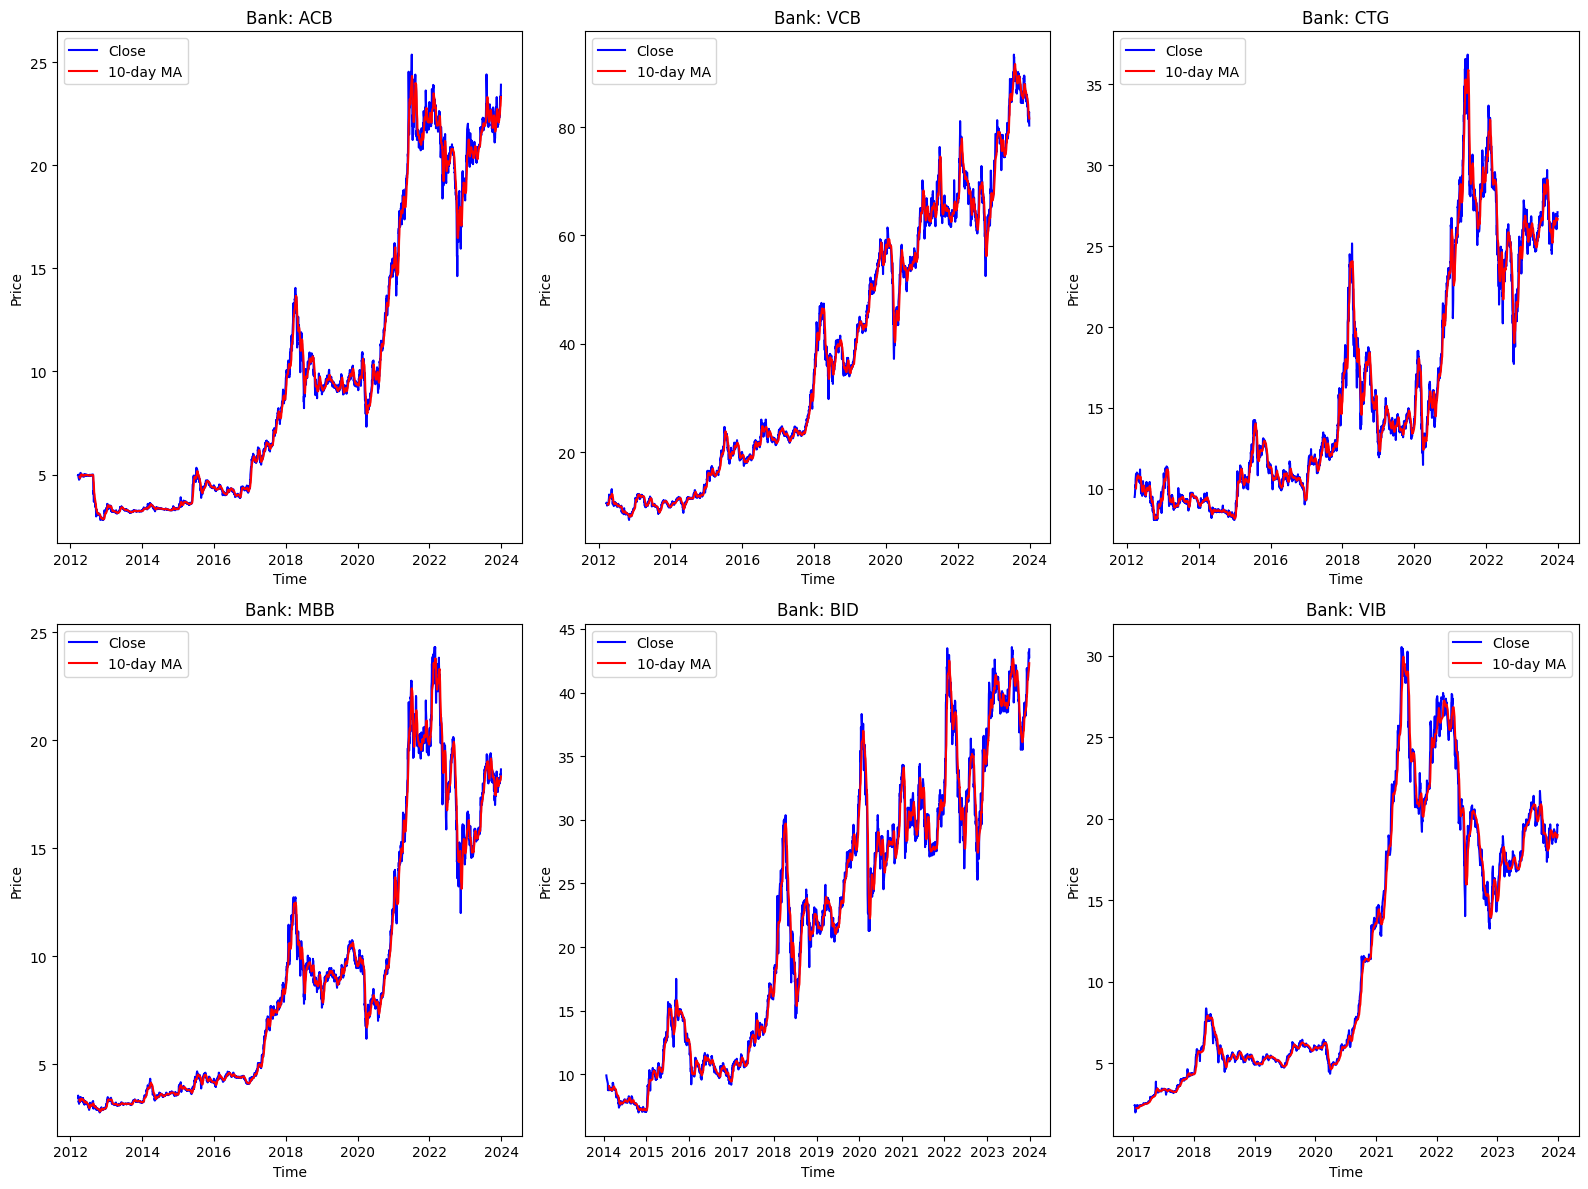

In [ ]:
# Copy to another dataframe
stocks_copy = stocks.copy()

# Calculate the 10-day moving average for each ticker
stocks_copy['MA10'] = stocks_copy.groupby('ticker')['close'].transform(lambda x: x.rolling(10).mean())

# Get the list of unique tickers
tickers = stocks_copy['ticker'].unique()

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

# Flatten the axes array
axs = axs.flatten()

# Create a separate plot for each ticker
for i, ticker in enumerate(tickers):
    # Select the data for this ticker
    stocks_copy_ticker = stocks_copy[stocks_copy['ticker'] == ticker]

    # Plot the closing price and the 10-day moving average
    sns.lineplot(data=stocks_copy_ticker, x='time', y='close', label='Close', color='blue', ax=axs[i])
    sns.lineplot(data=stocks_copy_ticker, x='time', y='MA10', label='10-day MA', color='red', ax=axs[i])

    # Set the title and labels
    axs[i].set_title(f'Bank: {ticker}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Price')
    axs[i].legend()

# Show the plots
plt.tight_layout()
plt.show()

We can see that at most peak points, the close prices of all 6 stocks are slightly above the 10-day Moving Average line, so we can consider all 6 stocks to have a bullish trend throughout the period. stock survey.

Plotting 50-day moving averages

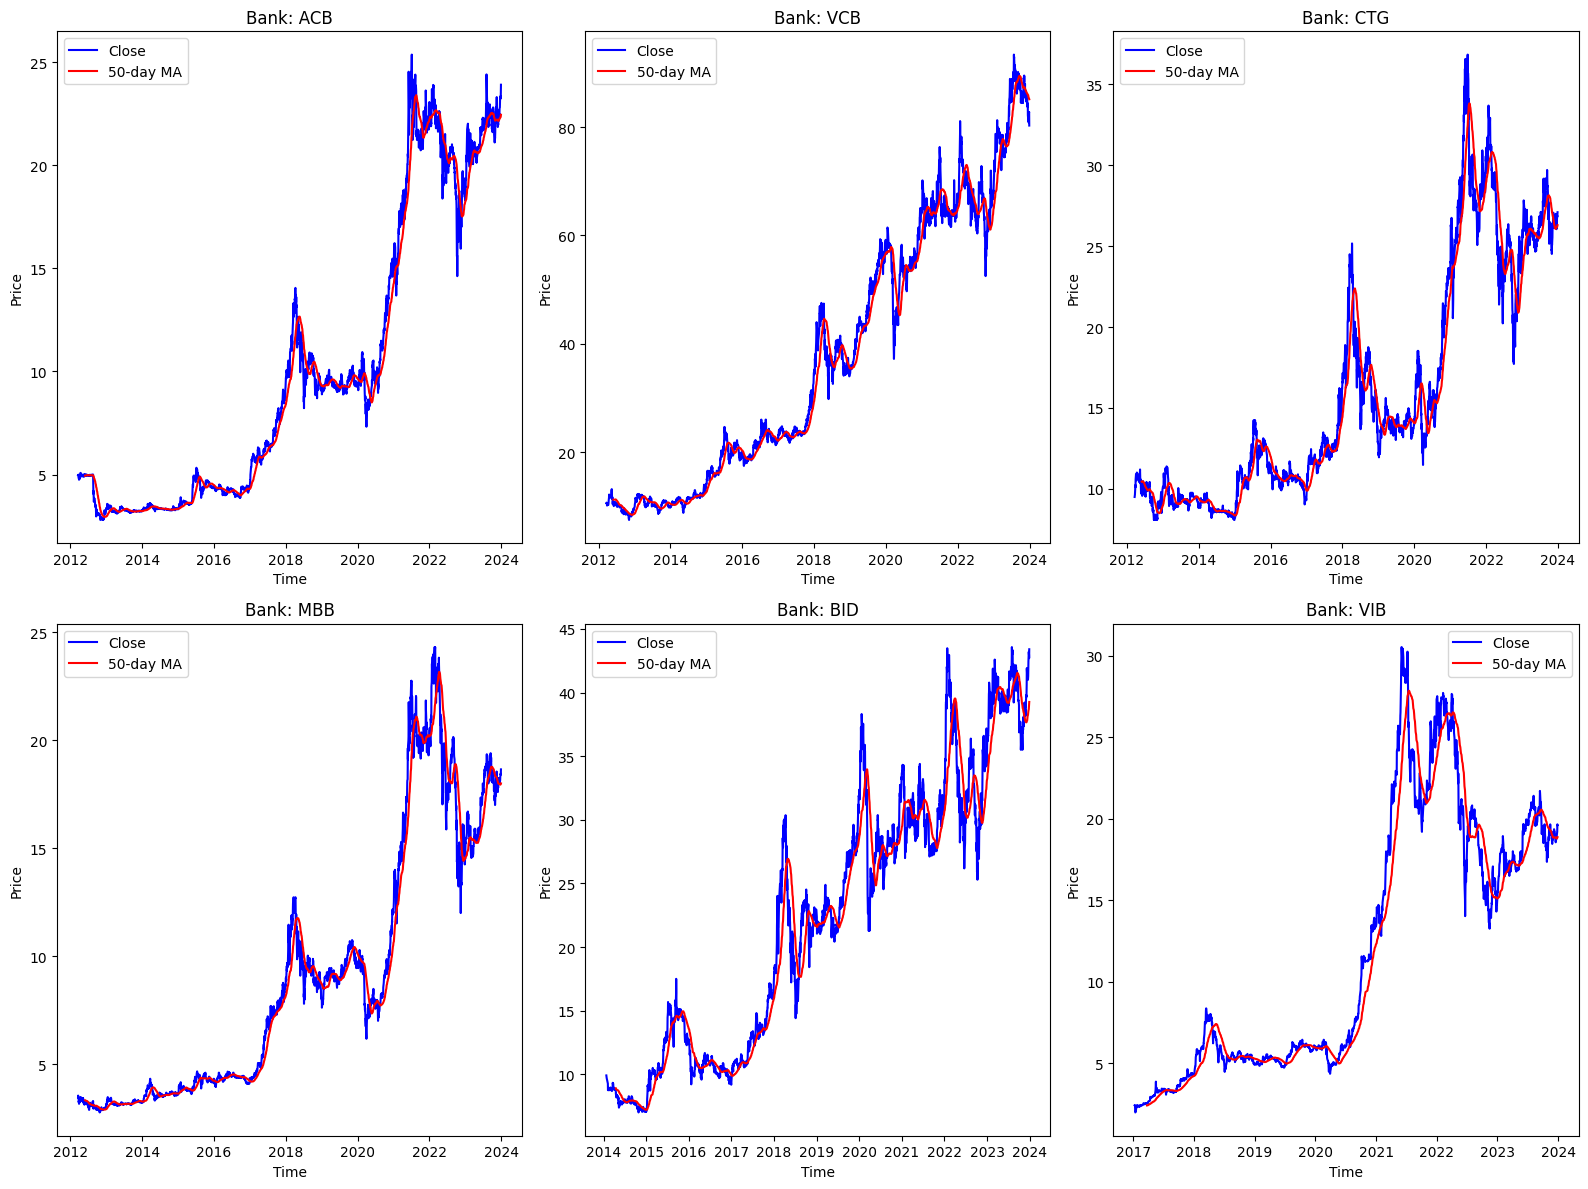

In [ ]:
# Calculate the 50-day moving average for each ticker
stocks_copy['MA50'] = stocks_copy.groupby('ticker')['close'].transform(lambda x: x.rolling(50).mean())

# Get the list of unique tickers
tickers = stocks_copy['ticker'].unique()

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

# Flatten the axes array
axs = axs.flatten()

# Create a separate plot for each ticker
for i, ticker in enumerate(tickers):
    # Select the data for this ticker
    stocks_copy_ticker = stocks_copy[stocks_copy['ticker'] == ticker]

    # Plot the closing price and the 10-day moving average
    sns.lineplot(data = stocks_copy_ticker, x = 'time', y = 'close', label = 'Close', color = 'blue', ax = axs[i])
    sns.lineplot(data = stocks_copy_ticker, x = 'time', y = 'MA50', label = '50-day MA', color = 'red', ax = axs[i])

    # Set the title and labels
    axs[i].set_title(f'Bank: {ticker}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Price')
    axs[i].legend()

# Show the plots
plt.tight_layout()
plt.show()

Similar to the 10-day moving average, the close prices of all 6 stocks are above the 50-day moving average, so all 6 stocks are in a bullish (upward) trend.

## <a class = "anchor" id = "4.2">*Visualizing bank_metrics data*</a>

### <a class = "anchor" id = "4.2.1">**_Visualizing revenue_**</a>

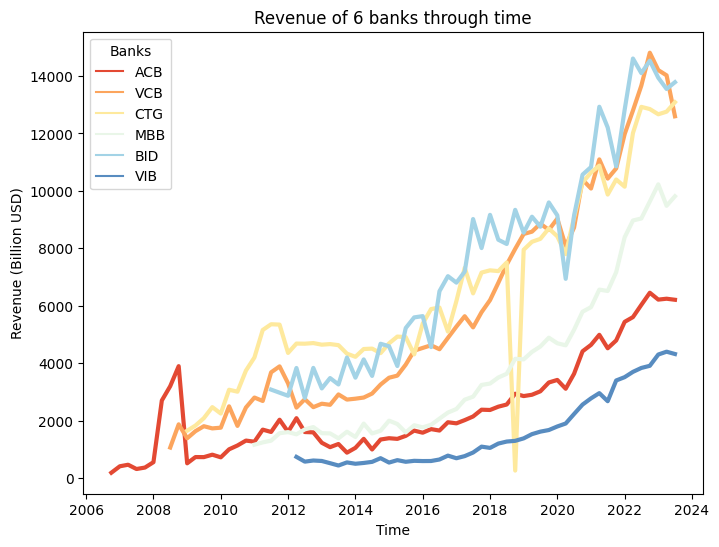

In [ ]:
plt.figure(figsize = (8, 6))
sns.lineplot(x = 'index', y = 'revenue', data = bank_metrics1.reset_index(),
             hue = 'ticker_x', palette = 'RdYlBu', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('Revenue (Billion USD)')
plt.title('Revenue of 6 banks through time')
plt.legend(title = 'Banks')
plt.show()

We can deduct some insights:
- Vietcombank (VCB) and BIDV (BID) have their revenues increase sharply since 2009 and are and will be continuing to lead the game among 6 banks
- Vietinbank (CTG) also have their revenues going up, though having a steep drop in the end of 2018
- ACB, MB Bank (MBB) and VIB Bank (VIB) also have their revenues going up, but not as steep as the other three.

### <a class = "anchor" id = "4.2.2">**_Visualizing total asset, total liabilities, total equity of 6 banks_**</a>

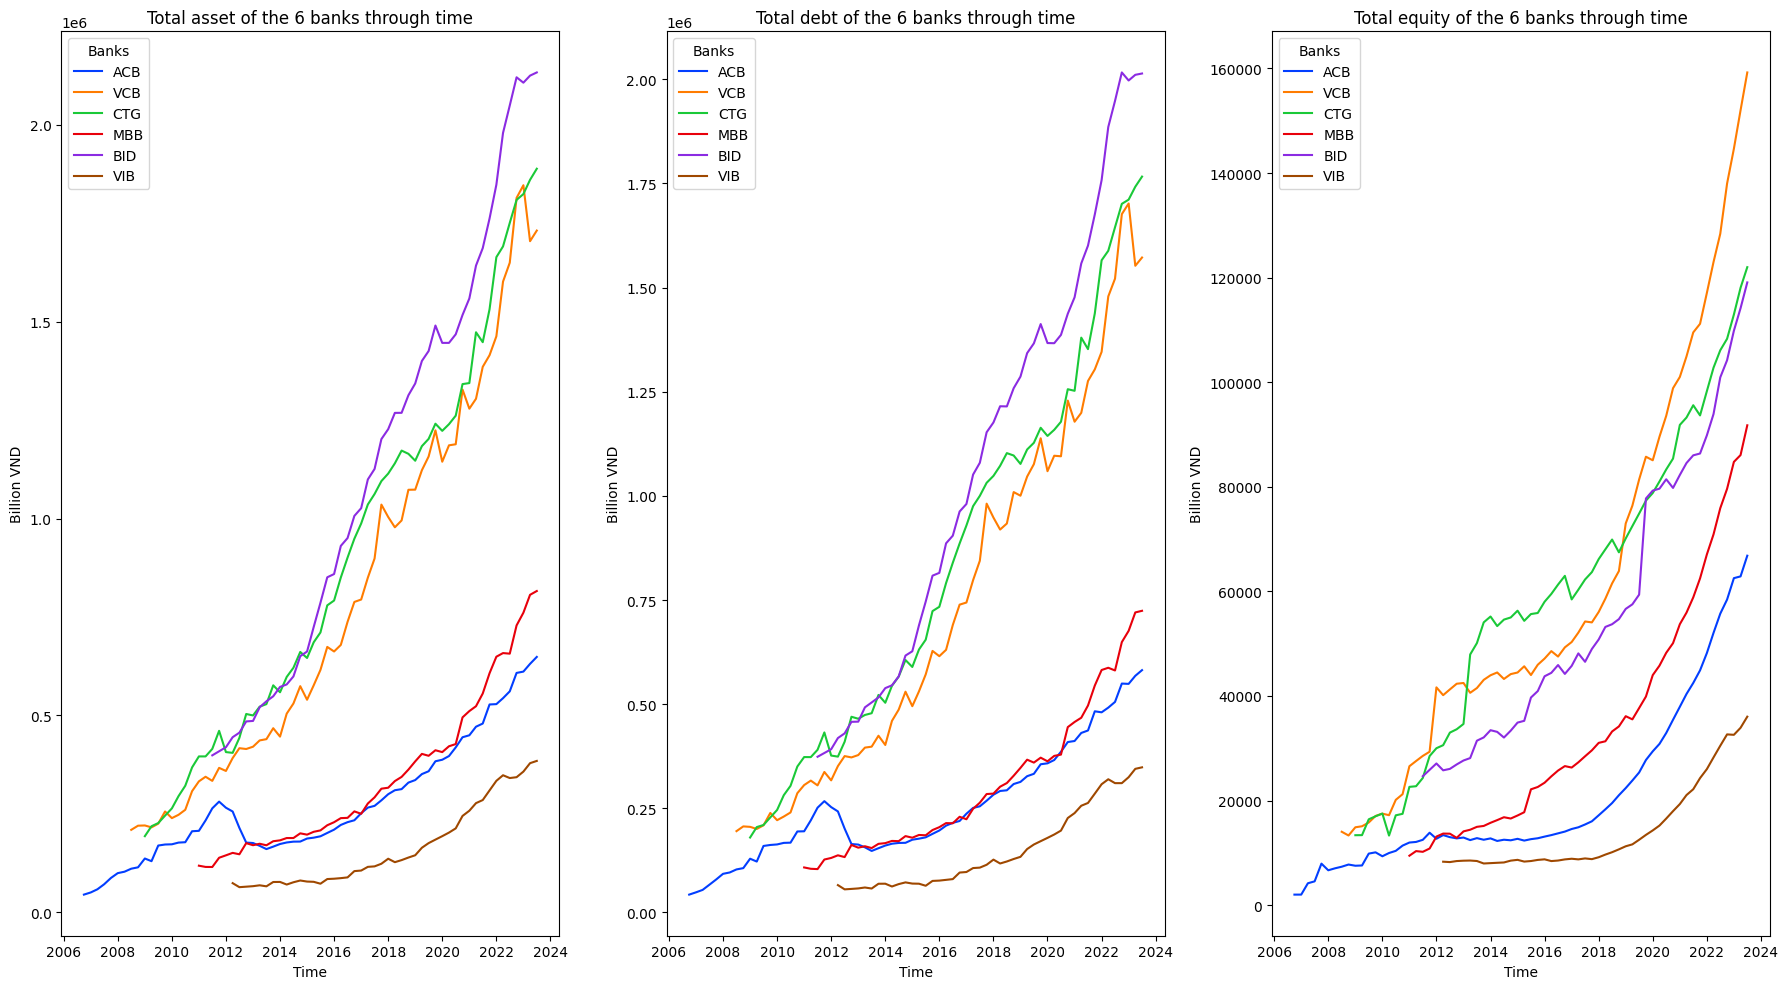

In [ ]:
bank_metrics1 = bank_metrics1.reset_index()

fig, axs = plt.subplots(1, 3, figsize = (18, 10))
axs = axs.flatten()
cols = ['asset', 'debt', 'equity']

for i, col in enumerate(cols):
     # Filter the columns needed
     metric = bank_metrics1[['index', 'ticker_x', col]]
     # Plot the graph
     sns.lineplot(data = metric, x = 'index', y = col, hue = 'ticker_x', ax = axs[i])
     # Set the title and labels
     axs[i].set_title(f'Total {col} of the 6 banks through time')
     axs[i].set_xlabel('Time')
     axs[i].set_ylabel('Billion VND')
     axs[i].legend(title = 'Banks')

# Show the plots
plt.tight_layout()
plt.show()

- In general, BIDV has had the highest total assets but also the highest total debt, leading to not so high total equity, though still higher than most of them.
- ACB, VIB and MBB have pretty low total asset and debt, but their total equity are pretty large, though still lower than the other three.

### <a class = "anchor" id = "4.2.3">**_Visualizing total cash stored_**</a>

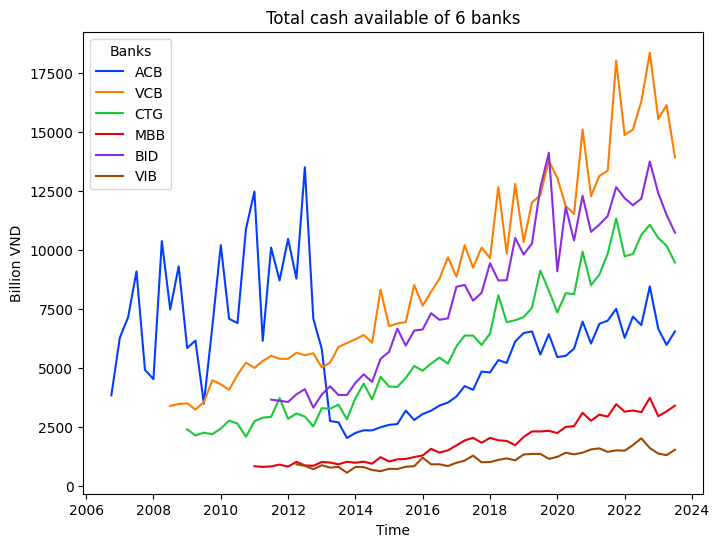

In [ ]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = bank_metrics1, x = 'index', y = 'cash',
             hue = 'ticker_x', palette = 'bright')
plt.xlabel('Time')
plt.ylabel('Billion VND')
plt.title('Total cash available of 6 banks')
plt.legend(title = 'Banks')
plt.show()

For cash, ACB showed signs of very strong fluctuations and instability from 2008 to 2012, then dropped sharply in 2013 and has been steadily increasing until now. The three stocks BIDV, Vietcombank and Vietinbank have increasing amounts of cash over time. Two banks, MB Bank and VIB Bank, also have increasing amounts of cash over time, but not significantly compared to the remaining banks.

### <a class = "anchor" id = "4.2.4">**_Visualizing operation expense_**</a>

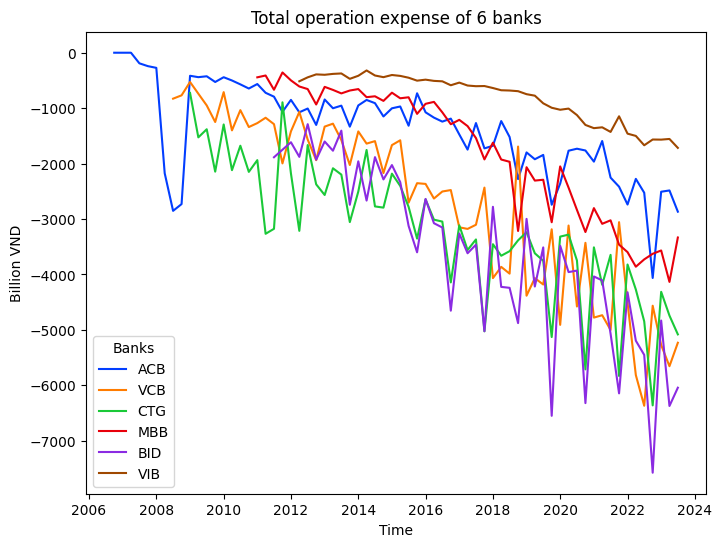

In [ ]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = bank_metrics1, x = 'index', y = 'operationExpense',
             hue = 'ticker_x', palette = 'bright')
plt.xlabel('Time')
plt.ylabel('Billion VND')
plt.title('Total operation expense of 6 banks')
plt.legend(title = 'Banks')
plt.show()

* We can clearly see that VIB Bank has the highest operating costs
* Banks all have reduced operating costs over time, with the sharpest decline being BIDV, Vietcombank and Vietinbank.

### <a class = "anchor" id = "4.2.5">**_Visualizing ROA and ROE_**</a>

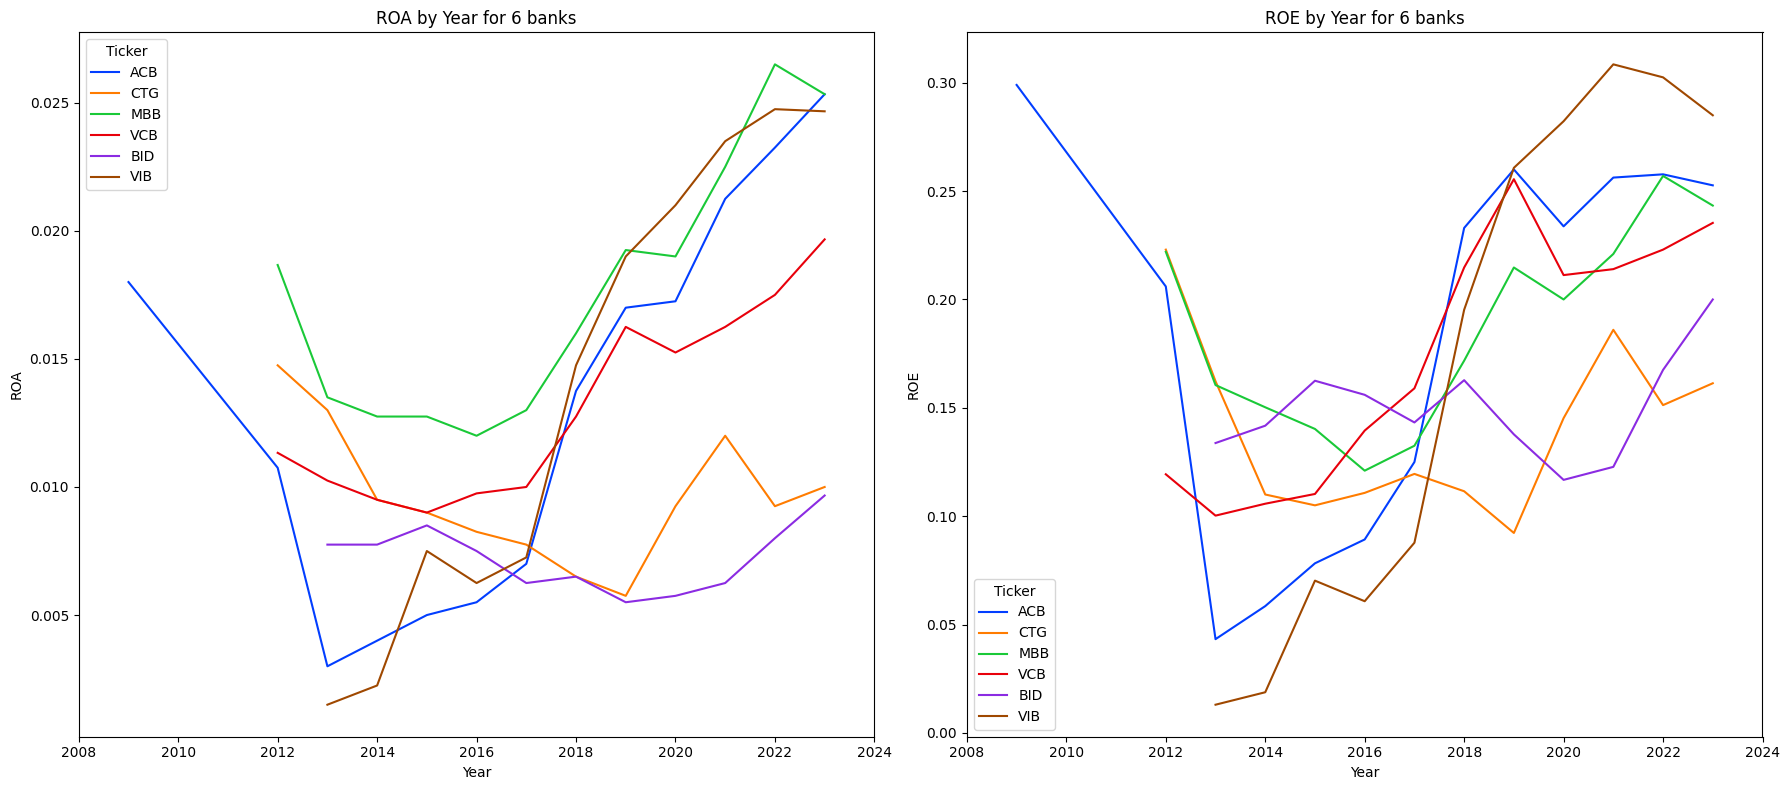

In [ ]:
bank_metrics2_yearly = bank_metrics2.groupby([bank_metrics2.index.year, 'ticker_y']).mean()
bank_metrics2_yearly = bank_metrics2_yearly.reset_index()
bank_metrics2_yearly.columns = ['Year', 'Ticker', 'ROA', 'ROE', 'POE', 'POB', 'EPS']

fig, axs = plt.subplots(1, 2, figsize = (18, 8))

# Plot ROA
sns.lineplot(data = bank_metrics2_yearly, x = 'Year', y = 'ROA', hue = 'Ticker', palette = 'bright', ax = axs[0])
axs[0].set_title('ROA by Year for 6 banks')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('ROA')
axs[0].set_xlim([bank_metrics2_yearly['Year'].min() - 1, bank_metrics2_yearly['Year'].max() + 1])

# Plot ROE
sns.lineplot(data = bank_metrics2_yearly, x = 'Year', y = 'ROE', hue = 'Ticker', palette = 'bright', ax = axs[1])
axs[1].set_title('ROE by Year for 6 banks')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('ROE')
axs[1].set_xlim([bank_metrics2_yearly['Year'].min() - 1, bank_metrics2_yearly['Year'].max() + 1])

# Show the plots
plt.tight_layout()
plt.show()

VIB Bank, Vietinbank and ACB Bank (ACB) all have higher ROA and ROE than the rest, which shows that these banks have the ability to use assets and equity to convert into better profits than the other 3 banks.

### <a class = "anchor" id = "4.2.6">**_Visualizing EPS_**</a>

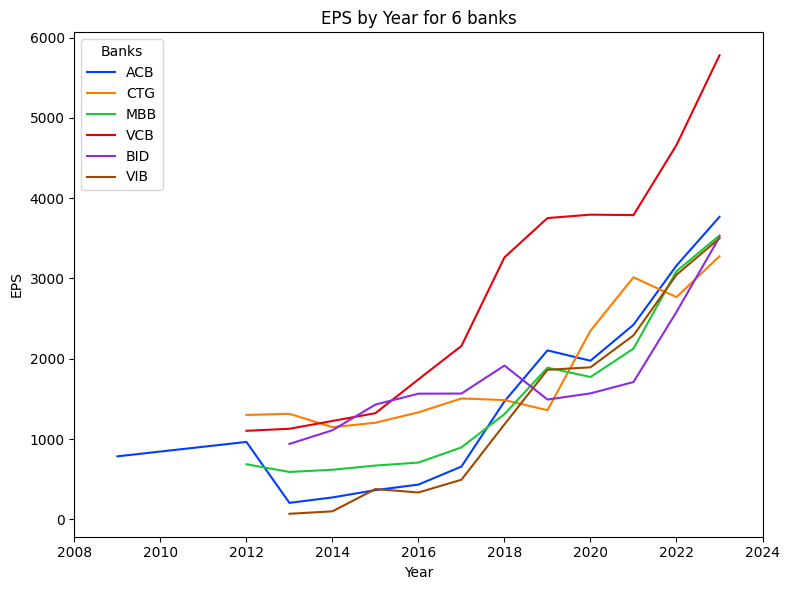

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches((8, 6))

# Plot ROA
sns.lineplot(data = bank_metrics2_yearly, x = 'Year', y = 'EPS', hue = 'Ticker', palette = 'bright', ax = axs)
axs.set_title('EPS by Year for 6 banks')
axs.set_xlabel('Year')
axs.set_ylabel('EPS')
axs.set_xlim([bank_metrics2_yearly['Year'].min() - 1, bank_metrics2_yearly['Year'].max() + 1])
axs.legend(title = 'Banks')

# Show the plots
plt.tight_layout()
plt.show()

Vietcombank has the highest EPS index and has increased very strongly over time, showing that this bank earns a lot of profit from issuing shares. The remaining banks have the same ability to profit from stocks.

### <a class = "anchor" id = "4.2.7">**_Heatmap_**</a>

<Axes: >

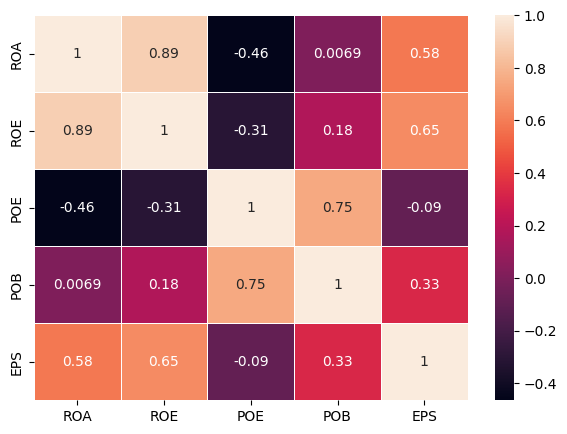

In [ ]:
corr_matrix = bank_metrics2_yearly.drop(['Year', 'Ticker'], axis = 1).corr()
plt.figure(figsize = (7, 5))
sns.color_palette('coolwarm')
sns.heatmap(corr_matrix, annot = True, linewidth = .5)

The heatmap provided represents the correlation coefficients between pairs of variables: ROA, ROE, POE, POB, and EPS. Here are some insights:

- **ROA and ROE** have a strong positive correlation of **0.89**. This means that as ROA increases, ROE also tends to increase, and vice versa.
- **POE and POB** also have a strong positive correlation of **0.75**, indicating a similar relationship.
- **ROA and POE**, on the other hand, have a moderate negative correlation of **-0.46**. This suggests that as ROA increases, POE tends to decrease, and vice versa.

# <a id = "5">**LINEAR REGRESSION MODEL IMPLEMENTATION**</a>

## <a class = "anchor" id = "5.1">*Preparing the data*</a>

From this section, we will only use the `stocks` dataset to implement Machine Learning models such as Linear Regression. Specifically, we will predict stock price volatility, or in other words, realized volatility. Realized volatility is used to calculate the performance of the volatility prediction method. Here is the formula for realized volatility:
$$
\hat{\sigma} = \sqrt{\frac{1}{n - 1}\sum^{N}_{i = 1}{(r_n - \mu)^2}}
$$
where:
- $r$: return
- $\mu$: mean of return
- $n$: number of observations

Because we still lack too many feature variables, but other index data such as earnings per share, dividends per share, ... are not abundant enough to be able to conduct Machine Learning/Deep Learning, we will set lag paragraphs for column `close` move back 1 day, 2 days, 3 days, 1 week and 2 weeks and name those columns `close_lag1d`, `close_lag2d`, `close_lag3d`, `close_lag1w`, `close_lag2w `. In addition, we can also use a technical financial indicator to predict stock price volatility, which is **Bollinger bands**

Bollinger Bands are a trading tool used to determine entry and exit points for a trade. The bands are often used to determine overbought and oversold conditions. They are composed of three lines. One of the more common calculations uses a **_20-day simple moving average (SMA)_** for the middle band. The **_upper band_** is calculated by taking the middle band and adding twice the daily standard deviation to that amount. The **_lower band_** is calculated by taking the middle band minus two times the daily standard deviation.

Thus, the feature variables we can use to predict stock price volatility include:
- `close`
- `close_lag1d`
- `close_lag2d`
- `close_lag3d`
- `close_lag1w`
- `close_lag2w`
- `upper_band`
- `lower_band`

But first, we will split into 6 separate sets of dataframes corresponding to 6 banks.

In [ ]:
stocks = stocks.sort_values(['ticker', 'time'])

stocks['Return'] = (stocks['close'].pct_change()).astype(float).round(3)
stocks['Realized volatility'] = stocks['Return'].rolling(5).std()
stocks

time   open   high    low  close   volume ticker year_month  \
0    2012-03-20   4.93   5.03   4.87   4.97   862200    ACB    2012-03   
1    2012-03-21   4.95   5.05   4.89   4.99  1608000    ACB    2012-03   
2    2012-03-22   5.03   5.03   4.91   4.99   578600    ACB    2012-03   
3    2012-03-23   4.95   5.00   4.91   4.95  1402600    ACB    2012-03   
4    2012-03-26   5.05   5.06   4.97   4.99  1228700    ACB    2012-03   
...         ...    ...    ...    ...    ...      ...    ...        ...   
1735 2023-12-25  18.80  19.15  18.75  19.05  1528200    VIB    2023-12   
1736 2023-12-26  19.05  19.15  19.00  19.15  1730300    VIB    2023-12   
1737 2023-12-27  19.10  19.25  19.10  19.20  1900200    VIB    2023-12   
1738 2023-12-28  19.25  19.65  19.20  19.65  5151100    VIB    2023-12   
1739 2023-12-29  19.70  19.90  19.60  19.60  8957600    VIB    2023-12   

      Return  Realized volatility  
0        NaN                  NaN  
1      0.004                  NaN  
2      0.000                  NaN  
3     -0.008                  NaN  
4      0.008                  NaN  
...      ...                  ...  
1735   0.016             0.006189  
1736   0.005             0.006189  
1737   0.003             0.006189  
1738   0.023             0.009711  
1739  -0.003             0.010498  

[15996 rows x 10 columns]

In [ ]:
# Slice into 6 dataframes
acb = stocks[stocks['ticker'] == 'ACB']
bidv = stocks[stocks['ticker'] == 'BID']
vietinbank = stocks[stocks['ticker'] == 'CTG']
mbb = stocks[stocks['ticker'] == 'MBB']
vib = stocks[stocks['ticker'] == 'VIB']
vietcombank = stocks[stocks['ticker'] == 'VCB']

# Drop columns and sort values
cols = ['ticker', 'year_month']
acb = acb.drop(cols, axis = 1).sort_values('time')
bidv = bidv.drop(cols, axis = 1).sort_values('time')
vietinbank = vietinbank.drop(cols, axis = 1).sort_values('time')
mbb = mbb.drop(cols, axis = 1).sort_values('time')
vib = vib.drop(cols, axis = 1).sort_values('time')
vietcombank = vietcombank.drop(cols, axis = 1).sort_values('time')

Next, we will create the necessary columns such as `close_lag1d`, `close_lag2d`, `close_lag3d`, `close_lag1w`, `close_lag2w`, `upper_band`, `lower_band`.

In [ ]:
def create_columns(df):
     # Calculate lags
     df['close_lag1d'] = df['close'].shift(1)
     df['close_lag2d'] = df['close'].shift(2)
     df['close_lag3d'] = df['close'].shift(3)
     df['close_lag1w'] = df['close'].shift(7)
     df['close_lag2w'] = df['close'].shift(14)

     # Calculate Bollinger bands
     df['20 Day MA'] = df['close'].rolling(window=20).mean()
     df['20 Day STD'] = df['close'].rolling(window=20).std()
     df['upper_band'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
     df['lower_band'] = df['20 Day MA'] - (df['20 Day STD'] * 2)

     return df

dfs = [acb, bidv, vietinbank, mbb, vib, vietcombank]
dfs = [create_columns(df) for df in dfs]

In [ ]:
# Then, drop null rows
acb = acb.dropna()
bidv = bidv.dropna()
vietinbank = vietinbank.dropna()
mbb = mbb.dropna()
vib = vib.dropna()
vietcombank = vietcombank.dropna()

# View one of the six dataframes to see the results
vietcombank

time   open   high    low  close   volume  Return  \
19   2012-04-17  11.63  12.16  11.59  12.16  1139680   0.049   
20   2012-04-18  12.05  12.45  11.81  12.02  1231280  -0.012   
21   2012-04-19  12.02  12.13  11.81  11.91  1044740  -0.009   
22   2012-04-20  12.02  12.02  11.63  11.70   563060  -0.018   
23   2012-04-23  11.66  11.81  11.63  11.66   404510  -0.003   
...         ...    ...    ...    ...    ...      ...     ...   
2940 2023-12-25  80.90  81.80  80.70  81.80  1301600   0.011   
2941 2023-12-26  82.00  82.80  82.00  82.80   971200   0.012   
2942 2023-12-27  82.90  83.20  82.50  82.70   899600  -0.001   
2943 2023-12-28  82.70  83.10  82.40  82.80   703200   0.001   
2944 2023-12-29  83.50  83.90  80.30  80.30  1621700  -0.030   

      Realized volatility  close_lag1d  close_lag2d  close_lag3d  close_lag1w  \
19               0.017370        11.59        11.09        10.95        10.24   
20               0.025952        12.16        11.59        11.09        10.24   
21               0.028900        12.02        12.16        11.59        10.38   
22               0.033053        11.91        12.02        12.16        10.53   
23               0.027153        11.70        11.91        12.02        10.95   
...                   ...          ...          ...          ...          ...   
2940             0.005891        80.90        80.90        81.10        84.40   
2941             0.006892        81.80        80.90        80.90        82.20   
2942             0.006892        82.80        81.80        80.90        81.50   
2943             0.006348        82.70        82.80        81.80        81.20   
2944             0.017009        82.80        82.70        82.80        81.10   

      close_lag2w  20 Day MA  20 Day STD  upper_band  lower_band  
19          10.13    10.5950    0.508884   11.612768    9.577232  
20          10.31    10.6680    0.600137   11.868274    9.467726  
21          10.21    10.7335    0.660751   12.055003    9.411997  
22          10.31    10.7850    0.694804   12.174608    9.395392  
23          10.35    10.8415    0.718517   12.278533    9.404467  
...           ...        ...         ...         ...         ...  
2940        85.40    83.7100    1.869393   87.448787   79.971213  
2941        85.90    83.5600    1.812355   87.184711   79.935289  
2942        85.20    83.4400    1.784259   87.008517   79.871483  
2943        85.00    83.3450    1.764109   86.873217   79.816783  
2944        84.20    83.1100    1.843309   86.796619   79.423381  

[2926 rows x 17 columns]

## <a class = "anchor" id = "5.2">*Linear Regression model training*</a>

Next, we will create training and test sets for each dataset. To facilitate that work, we will create 24 datasets, including 6 sets of `X_train`, 6 sets of `X_test`, 6 sets of `Y_train` and 6 sets of `Y_test` for all 6 banks.

In [ ]:
from datetime import datetime
# Test set will be from 2023-01-01, thus we have to define them.
date_format = "%Y-%m-%d"
split_date = datetime.strptime('2023-01-01', date_format)

# Define variable names
bank_names = ['acb', 'bidv', 'vietinbank', 'mbb', 'vib', 'vietcombank']
X_train_names = ['X_train_acb', 'X_train_bidv', 'X_train_vietinbank', 'X_train_mbb', 'X_train_vib', 'X_train_vietcombank']
Y_train_names = ['Y_train_acb', 'Y_train_bidv', 'Y_train_vietinbank', 'Y_train_mbb', 'Y_train_vib', 'Y_train_vietcombank']
X_test_names = ['X_test_acb', 'X_test_bidv', 'X_test_vietinbank', 'X_test_mbb', 'X_test_vib', 'X_test_vietcombank']
Y_test_names = ['Y_test_acb', 'Y_test_bidv', 'Y_test_vietinbank', 'Y_test_mbb', 'Y_test_vib', 'Y_test_vietcombank']

# Filter into features and target variable, each would have train set and test set
# 6 banks' dataframes contain 6 train sets of features, 6 test sets of features, 6 train sets of target variable and 6 test sets of target variable
for df_name, X_train_name, Y_train_name, X_test_name, Y_test_name in zip(bank_names, X_train_names, Y_train_names, X_test_names, Y_test_names):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    train = globals()[df_name][globals()[df_name]['time'] < split_date]
    test = globals()[df_name][globals()[df_name]['time'] >= split_date]

    # Tạo các biến X và Y cho tập huấn luyện và tập kiểm tra
    globals()[X_train_name] = train[['close', 'close_lag1d', 'close_lag2d', 'close_lag3d', 'close_lag1w', 'close_lag2w', 'upper_band', 'lower_band']]
    globals()[Y_train_name] = train['Realized volatility']
    globals()[X_test_name] = test[['close', 'close_lag1d', 'close_lag2d', 'close_lag3d', 'close_lag1w', 'close_lag2w', 'upper_band', 'lower_band']]
    globals()[Y_test_name] = test['Realized volatility']

# View the shape of one train and test datasets
(X_train_vib.shape, X_test_vib.shape)

((1472, 8), (249, 8))

Talking a little bit about multiple linear regression model, multiple linear regression refers to a statistical technique that uses two or more independent variables to predict the outcome of a dependent variable. Here's the formula of multiple linear regression
$$
Y = \beta _0 + \beta _1 X_1 + \beta _2 X_2 + \ldots + \beta _n X_n + \epsilon
$$
with:
- $Y$: dependent variable
- $X_1, X_2, \ldots, X_n$: independent variables
- $\beta _0, \beta _1, \ldots, \beta _n$: regression coefficients
- $\epsilon$: model's random error

Now, we will initialize and fit the model.

In [ ]:
model_names = ['model_acb', 'model_bidv', 'model_vietinbank',
               'model_mbb', 'model_vib', 'model_vietcombank']

# Tạo, fit, và dự đoán cho mỗi mô hình
for X_train_name, Y_train_name, X_test_name, Y_test_name, model_name in zip(X_train_names, Y_train_names, X_test_names, Y_test_names, model_names):
     # Initialize 6 Linear Regression objects
     globals()[model_name] = LinearRegression()

     # Fit the model with the train set
     globals()[model_name].fit(globals()[X_train_name], globals()[Y_train_name])

     # Predict the test set
     globals()[Y_test_name + '_pred'] = globals()[model_name].predict(globals()[X_test_name])

# List of prediction variables
Y_pred_names = ['Y_test_acb_pred', 'Y_test_bidv_pred', 'Y_test_vietinbank_pred', 'Y_test_mbb_pred', 'Y_test_vib_pred', 'Y_test_vietcombank_pred']

# Print the predictions
for Y_pred_name in Y_pred_names:
     print(f"{Y_pred_name}:\n{globals()[Y_pred_name]}\n")

Y_test_acb_pred:
[0.01448665 0.01236224 0.01218466 0.01042538 0.01028537 0.01035005
 0.01208753 0.01466086 0.01471925 0.01791349 0.02053192 0.02390127
 0.02633298 0.03001954 0.02880964 0.03069774 0.02957446 0.03135146
 0.02902159 0.02963136 0.02792991 0.02597805 0.02380464 0.02164853
 0.02007132 0.01988342 0.02100515 0.02000158 0.01906944 0.01784852
 0.01583118 0.01456733 0.01320063 0.01103105 0.01342256 0.01133301
 0.01445943 0.01371863 0.01218315 0.01199059 0.01212861 0.01318452
 0.01346028 0.01140305 0.00978846 0.00945353 0.01146075 0.01221205
 0.01401777 0.01163698 0.01142426 0.01128397 0.01035193 0.01036225
 0.00906661 0.0082541  0.00666698 0.00677954 0.00788341 0.00862632
 0.0077053  0.00715126 0.0060783  0.00673194 0.00717077 0.00757428
 0.00805478 0.00825821 0.00797843 0.00726366 0.00603651 0.00580497
 0.00664185 0.00818343 0.01020674 0.01128816 0.01182214 0.01275373
 0.01226778 0.01115494 0.0099346  0.00859604 0.00719963 0.00641113
 0.00590899 0.00645323 0.0069786  0.00690357 

Now, we will view the intercept and coefficients of each model.

In [ ]:
coef_df = pd.DataFrame(columns = ['Bank', 'Intercept', 'close', 'close_lag1d', 'close_lag2d',
                                  'close_lag3d', 'close_lag1w', 'close_lag2w', 'upper_band', 'lower_band'])
for bank, model in zip(bank_names, model_names):
     coef_df = coef_df.append({'Bank': bank, 'Intercept': globals()[model].intercept_, 'close': globals()[model].coef_[0],
                               'close_lag1d': globals()[model].coef_[1], 'close_lag2d': globals()[model].coef_[2],
                               'close_lag3d': globals()[model].coef_[3], 'close_lag1w': globals()[model].coef_[4],
                               'close_lag2w': globals()[model].coef_[5], 'upper_band': globals()[model].coef_[6],
                               'lower_band': globals()[model].coef_[7]}, ignore_index = True)
coef_df

<ipython-input-51-cde90f0d0266>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append({'Bank': bank, 'Intercept': globals()[model].intercept_, 'close': globals()[model].coef_[0],
<ipython-input-51-cde90f0d0266>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append({'Bank': bank, 'Intercept': globals()[model].intercept_, 'close': globals()[model].coef_[0],
<ipython-input-51-cde90f0d0266>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append({'Bank': bank, 'Intercept': globals()[model].intercept_, 'close': globals()[model].coef_[0],
<ipython-input-51-cde90f0d0266>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

Bank  Intercept     close  close_lag1d  close_lag2d  close_lag3d  \
0          acb   0.012000  0.000453    -0.002167    -0.001282    -0.002781   
1         bidv   0.016877  0.000624    -0.000708    -0.000602    -0.000931   
2   vietinbank   0.014426  0.001186    -0.001252    -0.001084    -0.001498   
3          mbb   0.012408  0.000980    -0.001898    -0.001107    -0.002137   
4          vib   0.017522 -0.000134    -0.000686    -0.000045    -0.001065   
5  vietcombank   0.016615  0.000225    -0.000374    -0.000147    -0.000309   

   close_lag1w  close_lag2w  upper_band  lower_band  
0     0.001019    -0.000763    0.010306   -0.005426  
1     0.000887    -0.000624    0.003637   -0.002623  
2     0.001978    -0.000349    0.004904   -0.004302  
3     0.003591    -0.000118    0.007013   -0.006899  
4     0.000129    -0.001000    0.004766   -0.002422  
5    -0.000186     0.000280    0.001842   -0.001539

From here, we can derive the equation for each bank:
- ACB
$$
\text{Realized volatility} = .012 + .000454\times{\text{Close price}} - .002176\times{\text{Close price 1-day lag}} \\ - .001264\times{\text{Close price 2-day lag}} - .00279\times{\text{Close price 3-day lag}} \\ + .001019\times{\text{Close price 1-week lag}} - .000766\times{\text{Close price 2-week lag}} \\ + .010308\times{\text{Upper Bollinger band}} - .005425\times{\text{Lower bollinger band}}
$$
- BIDV
$$
\text{Realized volatility} = .016877 + .000605\times{\text{Close price}} - .000693\times{\text{Close price 1-day lag}} \\ - .000578\times{\text{Close price 2-day lag}} - .000941\times{\text{Close price 3-day lag}} \\ + .000888\times{\text{Close price 1-week lag}} - .000615\times{\text{Close price 2-week lag}} \\ + .003628\times{\text{Upper Bollinger band}} - .002632\times{\text{Lower bollinger band}}
$$
- Vietinbank
$$
\text{Realized volatility} = .014397 + .001201\times{\text{Close price}} - .00126\times{\text{Close price 1-day lag}} \\ - .001077\times{\text{Close price 2-day lag}} - .001530\times{\text{Close price 3-day lag}} \\ + .001993\times{\text{Close price 1-week lag}} - .000345\times{\text{Close price 2-week lag}} \\ + .004895\times{\text{Upper Bollinger band}} - .004290\times{\text{Lower bollinger band}}
$$
- MB Bank
$$
\text{Realized volatility} = .012399 + .000972\times{\text{Close price}} - .001893\times{\text{Close price 1-day lag}} \\ - .001107\times{\text{Close price 2-day lag}} - .002197\times{\text{Close price 3-day lag}} \\ + .003597\times{\text{Close price 1-week lag}} - .000161\times{\text{Close price 2-week lag}} \\ + .007058\times{\text{Upper Bollinger band}} - .006842\times{\text{Lower bollinger band}}
$$
- VIB Bank
$$
\text{Realized volatility} = .017514 - .000152\times{\text{Close price}} - .000637\times{\text{Close price 1-day lag}} \\ - .000035\times{\text{Close price 2-day lag}} - .001071\times{\text{Close price 3-day lag}} \\ + .000125\times{\text{Close price 1-week lag}} - .000995\times{\text{Close price 2-week lag}} \\ + .004747\times{\text{Upper Bollinger band}} - .002443\times{\text{Lower bollinger band}}
$$
- Vietcombank
$$
\text{Realized volatility} = .016604 + .000224\times{\text{Close price}} - .000373\times{\text{Close price 1-day lag}} \\ - .000151\times{\text{Close price 2-day lag}} - .000315\times{\text{Close price 3-day lag}} \\ - .000195\times{\text{Close price 1-week lag}} + .000260\times{\text{Close price 2-week lag}} \\ + .001860\times{\text{Upper Bollinger band}} - .001517\times{\text{Lower bollinger band}}
$$

## <a class = "anchor" id = "5.3">*Model evaluation*</a>

### <a class = "anchor" id = "5.3.1">**_Metrics_**</a>

We will use three 4 metrics that would evaluate the efficiency and accuracy of the model, which include:
- Mean absolute error (MAE)
$$
\text{MAE} = \frac{1}{n} \sum^{n}_{i = 1}{|y_i - \hat{y}_i|}
$$
- Mean squared error (MSE)
$$
\text{MSE} = \frac{1}{n} \sum^{n}_{i = 1}{(y_i - \hat{y}_i)^2}
$$
- Root mean squared error (RMSE):
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum^{n}_{i = 1}{(y_i - \hat{y}_i)^2}}
$$
- R-squared score:
$$
R^2 = 1 - \frac{\sum^{n}_{i = 1}{(y_i - \hat{y}_i)^2}}{\sum^{n}_{i = 1}{(y_i - \bar{y})^2}}
$$

In [ ]:
evaluation_df = pd.DataFrame(columns = ['Bank', 'MAE', 'MSE', 'RMSE', 'R^2'])
row = 0
for bank, Y_test_name, Y_pred_name in zip(bank_names, Y_test_names, Y_pred_names):
     evaluation_set = [bank,
          mean_absolute_error(globals()[Y_test_name], globals()[Y_pred_name]),
          mean_squared_error(globals()[Y_test_name], globals()[Y_pred_name]),
          np.sqrt(mean_squared_error(globals()[Y_test_name], globals()[Y_pred_name])),
          r2_score(globals()[Y_test_name], globals()[Y_pred_name])
     ]
     evaluation_df.loc[row] = evaluation_set
     row += 1

evaluation_df

Bank       MAE       MSE      RMSE       R^2
0          acb  0.004686  0.000036  0.005973  0.183976
1         bidv  0.005801  0.000062  0.007905  0.156328
2   vietinbank  0.004525  0.000036  0.005982  0.252549
3          mbb  0.004859  0.000039  0.006265  0.023600
4          vib  0.006325  0.000060  0.007768  0.103250
5  vietcombank  0.004768  0.000038  0.006175  0.018826

### <a class = "anchor" id = "5.3.2">**_Actual vs predicted plot_**</a>

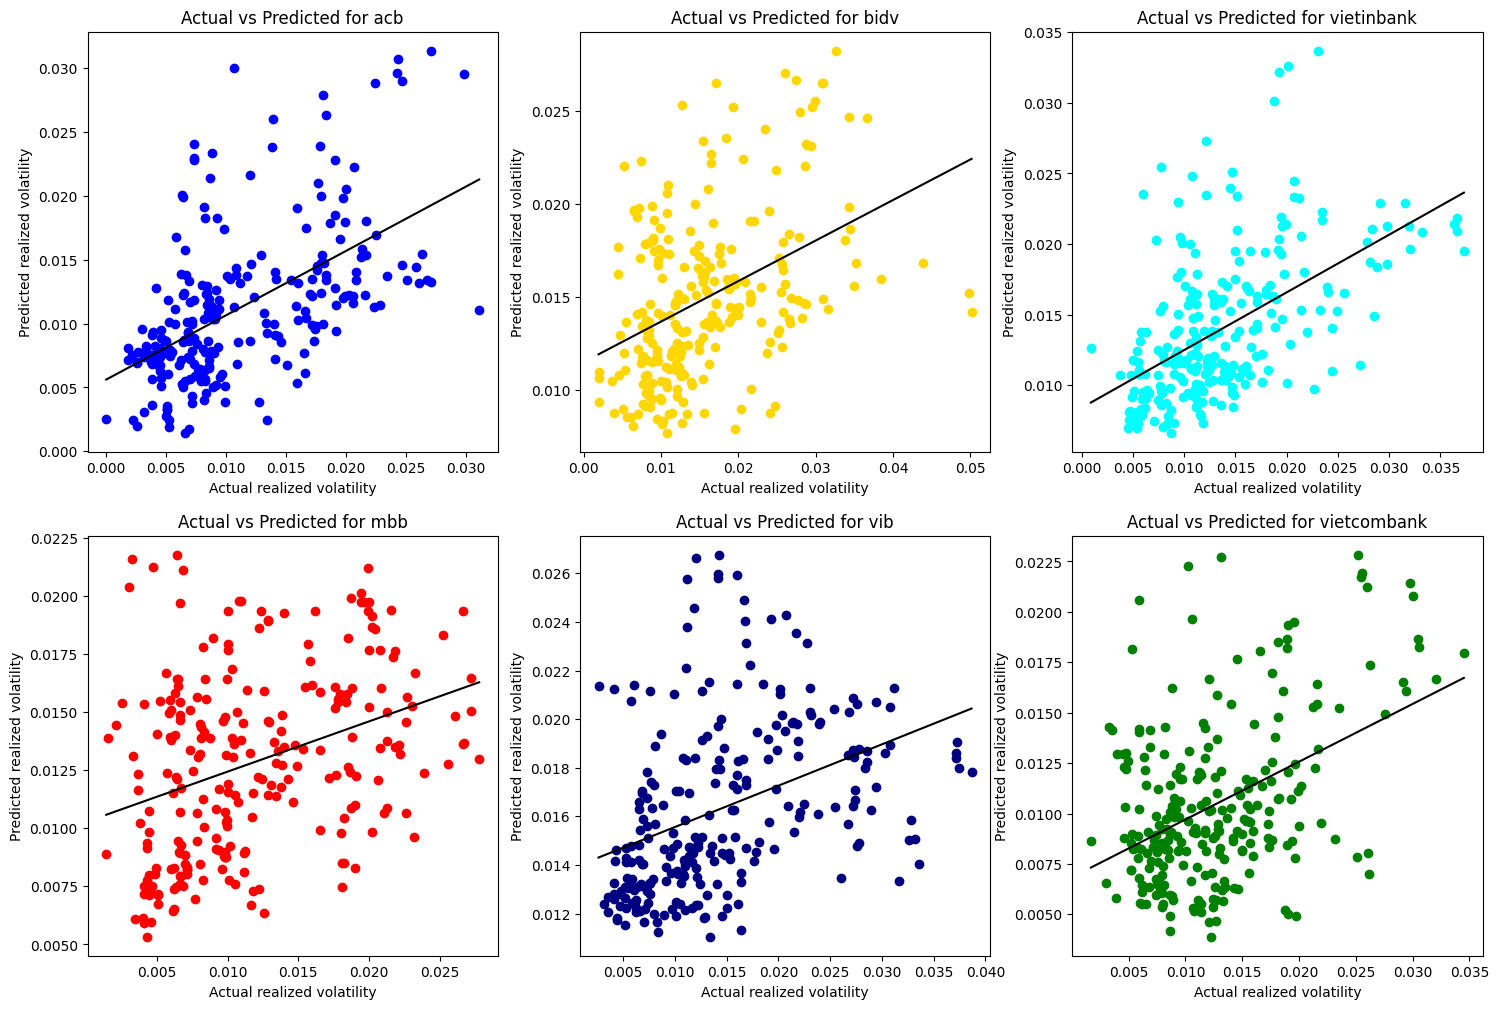

In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (18, 12))
axs = axs.flatten()
colors = ['blue', 'gold', 'aqua', 'red', 'navy', 'green']

for i, color, Y_test_name, Y_pred_name in zip(range(6), colors, Y_test_names, Y_pred_names):
    # Scatter plot
    axs[i].scatter(globals()[Y_test_name], globals()[Y_pred_name], color = color)

    # Calculate the line of best fit
    slope, intercept = np.polyfit(globals()[Y_test_name], globals()[Y_pred_name], 1)

    # Generate x values
    x_values = np.linspace(min(globals()[Y_test_name]), max(globals()[Y_test_name]), 1000)

    # Generate y values
    y_values = slope * x_values + intercept

    # Plot the line of best fit
    axs[i].plot(x_values, y_values, color = 'black')

    axs[i].set_title(f'Actual vs Predicted for {Y_test_name[7:]}')
    axs[i].set_xlabel('Actual realized volatility')
    axs[i].set_ylabel('Predicted realized volatility')

plt.show()

Through this, we can draw some of the following:
- All 6 banks have data scattered quite randomly and sporadically, indicated by the fact that the data points are not concentrated around the fitting line.
- Among them, Linear Regression seems to describe Vietinbank's data best (with R-squared = 25.17%) and MB Bank's data the worst (with R-squared = 1.36%)

### <a class = "anchor" id = "5.3.3">**_Residuals plot_**</a>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


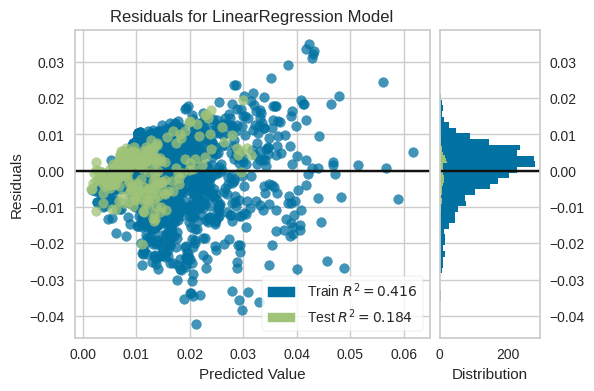

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


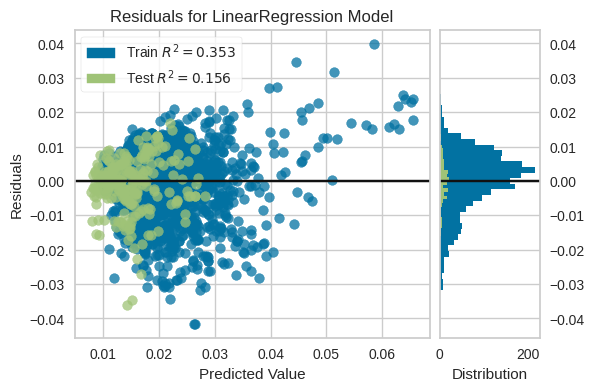

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


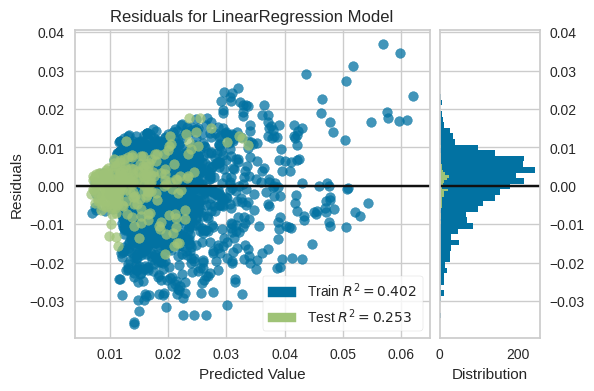

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


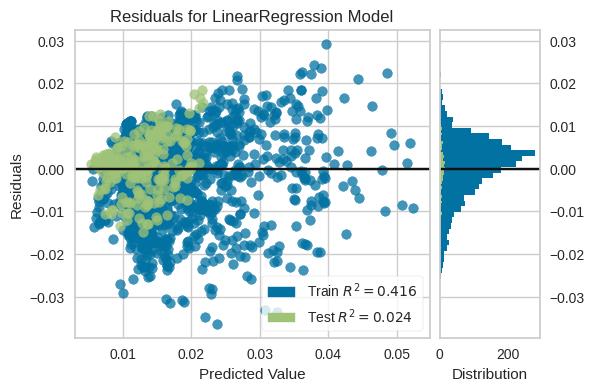

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


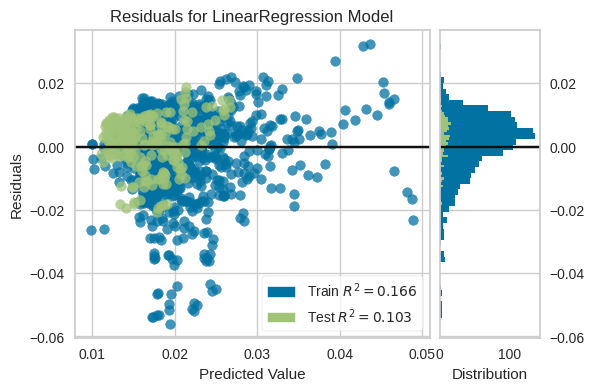

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


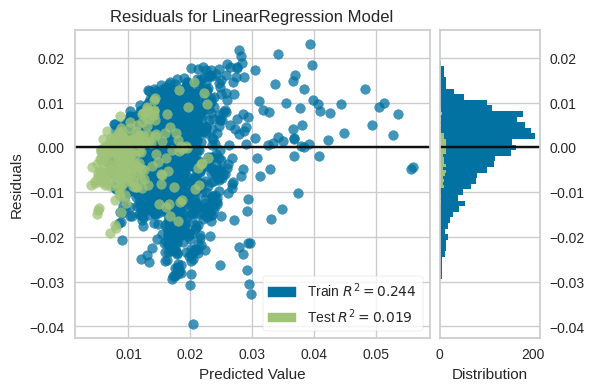

In [ ]:
from yellowbrick.regressor import ResidualsPlot

for i, (model_name, X_train_name, Y_train_name, X_test_name, Y_test_name, bank_name) in enumerate(zip(model_names, X_train_names, Y_train_names, X_test_names, Y_test_names, bank_names)):
    plt.figure(i, figsize=(6, 4))  # Create a new figure for this plot with a specified size
    # Instantiate the linear model and visualizer
    visualizer = ResidualsPlot(globals()[model_name])

    visualizer.fit(globals()[X_train_name], globals()[Y_train_name])  # Fit the training data to the model
    visualizer.score(globals()[X_test_name], globals()[Y_test_name])  # Evaluate the model on the test data

    # Set the title with the bank name
    visualizer.set_title(title = f'Residual plot for {bank_name}')
    visualizer.show()  # Show the plot


In order of appearance, the Residuals Plots are ACB, BIDV, Vietinbank, MB Bank, VIB Bank and Vietcombank. We see that the points are scattered randomly on the horizontal axis, so Linear Regression seems quite suitable for prediction. However, the R-squared of the train sets and test sets of all 6 stocks shows that Linear Regression cannot fully depict the meaning of the data. The histograms of each stock are also slightly right-skewed, suggesting that Linear Regression is not the best model to predict stock price volatility.

## <a class = "anchor" id = "5.4">*Plotting actual line vs predicted line*</a>

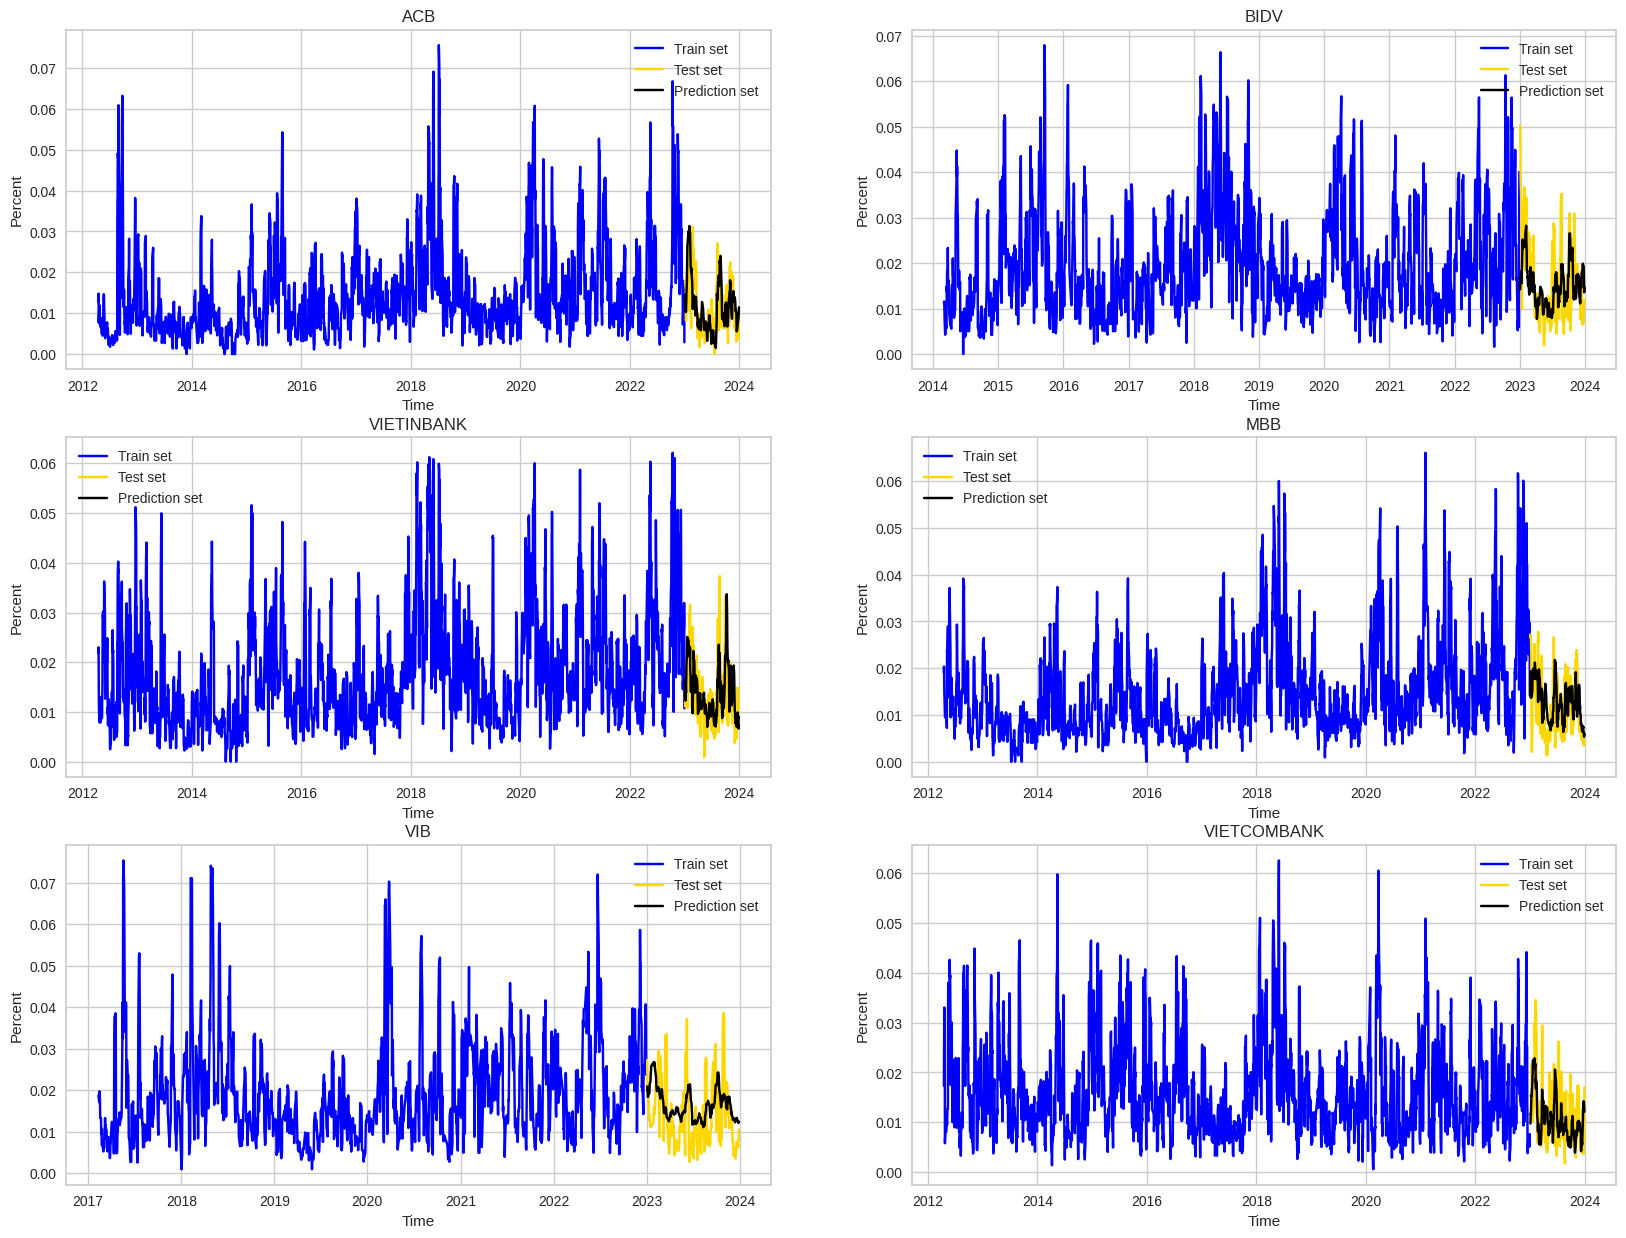

In [ ]:
fig, axs = plt.subplots(3, 2, figsize = (20, 15))
axs = axs.flatten()

for i, (bank_name, Y_test_name, Y_pred_name) in enumerate(zip(bank_names, Y_test_names, Y_pred_names)):
     axs[i].plot(
          globals()[bank_name].loc[globals()[bank_name]['time'] < split_date]['time'],
          globals()[bank_name].loc[globals()[bank_name]['time'] < split_date]['Realized volatility'],
          color = 'blue',
          label = 'Train set'
     )
     axs[i].plot(
          globals()[bank_name].loc[globals()[bank_name]['time'] >= split_date]['time'],
          globals()[Y_test_name],
          color = 'gold',
          label = 'Test set'
     )
     axs[i].plot(
          globals()[bank_name].loc[globals()[bank_name]['time'] >= split_date]['time'],
          globals()[Y_pred_name],
          color = 'black',
          label = 'Prediction set'
     )
     axs[i].set_title(f'{Y_test_name[7:].upper()}')
     axs[i].set_xlabel('Time')
     axs[i].set_ylabel('Percent')
     axs[i].legend()

We can draw some insights about performance as follows:

1. **Model accuracy**: Model predictions are not completely consistent with actual data. There were large peaks in volatility that the model did not predict accurately, especially around 2020.

2. **Model lag**: The predictor appears to have a lag in capturing sudden changes in stock price movements.

3. **Share Price Volatility**: There was a significant increase in volatility around 2020 for all banks profiled.

In summary, the Linear Regression model may have had difficulty accurately predicting stock price movements, especially during times of sudden changes. This may be due to the model's inability to capture all factors that influence stock price movements, or due to the use of outdated indices ('close_lag1d', 'close_lag2d', 'close_lag3d', ' close_lag1w', 'close_lag2w') are not enough to accurately predict future volatility.

# <a id = "6">**LSTM MODEL IMPLEMENTATION**</a>

## <a class = "anchor" id = "6.1">*What is LSTM?*</a>

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) architecture used for sequential data. It solves the problem of vanishing and exploding gradients that are common in RNNs.

LSTMs are specifically designed to address the long-term dependency problem. They achieve this by utilizing three different gates, the input gate, forget gate, and output gate. These gates work on cell state ($C$) and hidden state ($H$).

1. Input Gate ($i$): This gate is responsible for selecting the relevant new input from the previous layer. The input gate takes the new input ($x_t$) and the previous hidden state ($h_{t-1}$) as inputs.

It generates two vectors: a sigmoid vector ($i_t$) and a vector of the new cell candidate values ($n_{i_t}$), both of size N (where N is the number of neurons in the cell state).

2. Forget Gate ($f$): This gate is responsible for deciding how much of the cell state we will keep and how much we will discard based on the previous layer's information.

The forget gate takes the new input ($x_t$) and the previous hidden state ($h_{t-1}$) as inputs.

It generates two vectors: a sigmoid vector ($f_t$) and a vector of the new cell values ($n_{f_t}$), both of size N.

3. Output Gate ($o$): This gate is responsible for selecting the output value from the new cell state.

The output gate takes the new input ($x_t$) and the previous hidden state ($h_{t-1}$) as inputs.

It generates two vectors: a sigmoid vector ($o_t$) and a vector of the new output values ($n_{o_t}$), both of size N.

4. Cell State ($C$): The cell state ($C_t$) is a linear function of the input vector ($x_t$) and the previous cell state ($C_{t-1}$). It also depends on the input, forget, and output gates.

$C_t = i_t \times n_{i_t} + f_t \times C_{t-1} + o_t \times n_{o_t}$

5. Hidden State (H): The hidden state (H_t) is also known as the output of the LSTM cell. It is the final output of the LSTM and is used to predict the next input.

$H_t = o_t \times \tanh{C_t}$

6. LSTM Network: The LSTM network consists of multiple stacked LSTM cells. Each LSTM cell has an input size (I), output size (O), and number of neurons (N). The LSTM network can learn patterns from sequences of data, regardless of their lengths.

$H_{t-1} = H_{t-2} \times LSTM(x_{t-1}, H_{t-2})$

LSTMs are capable of remembering long-term dependencies due to the forget gate, which allows them to release cell state values that are no longer required. Additionally, LSTMs are gated units, meaning that they have input, forget, and output gates, which enable them to better handle sequences of data.

LSTMs have shown impressive results in various natural language processing and sequence prediction tasks. However, it is important to note that the exact mathematical details behind the architecture's effectiveness remain a topic of ongoing research.

## <a class = "anchor" id = "6.2">*Implementation*</a>

### <a class = "anchor" id = "6.2.1">**_Data scaling_**</a>


Feature scaling, also known as normalization, is an important preprocessing step for many machine learning algorithms, including LSTM models. Here are a few reasons why we need to scale our features before training an LSTM model:

1. Prevent the model from getting biased due to large features: Scaling the features ensures that each feature contributes equally to the model. Without scaling, features with large values could dominate the model, leading to poor generalization.

2. Speed up the training process: Many machine learning algorithms, including LSTM models, rely on gradient descent or similar optimization algorithms to minimize the loss function. Scaling the features can significantly speed up the convergence of these algorithms, leading to faster training times.

3. Ensure better model performance: Properly scaling the features can result in a more robust and accurate model. By standardizing the range of features, we can help the model to better identify the underlying patterns in the data.

Here's how you can do it.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Since we have to do feature scaling, we have to redefine the train set and test set
# Define the features and target variable
features = ['close', 'close_lag1d', 'close_lag2d', 'close_lag3d', 'close_lag1w', 'close_lag2w', 'upper_band', 'lower_band']
target = ['Realized volatility']
# Also define the scaler names:
scaler_names = ['scaler_acb', 'scaler_bidv', 'scaler_vietinbank', 'scaler_mbb', 'scaler_vib', 'scaler_vietcombank']
# Define the scaler names for the target variable
target_scaler_names = ['target_scaler_acb', 'target_scaler_bidv', 'target_scaler_vietinbank', 'target_scaler_mbb', 'target_scaler_vib', 'target_scaler_vietcombank']

# First, split into train and test set
for bank_name, X_train_name, Y_train_name, X_test_name, Y_test_name, scaler_name, target_scaler_name in zip(bank_names, X_train_names, Y_train_names, X_test_names, Y_test_names, scaler_names, target_scaler_names):
    # Split the data into training and testing sets
    train = globals()[bank_name][globals()[bank_name]['time'] < split_date]
    test = globals()[bank_name][globals()[bank_name]['time'] >= split_date]

    # Initialize scalers
    globals()[scaler_name] = MinMaxScaler()
    globals()[target_scaler_name] = MinMaxScaler()

    # Fit the scaler on the training set and transform both training and testing sets
    train[features] = globals()[scaler_name].fit_transform(train[features])
    test[features] = globals()[scaler_name].transform(test[features])

    # Fit and transform the target on the training set
    train[target] = globals()[target_scaler_name].fit_transform(np.array(train[target]).reshape(-1, 1))
    test[target] = globals()[target_scaler_name].transform(np.array(test[target]).reshape(-1, 1))

    # Create X and Y variables for training and testing sets
    X_train = train[features].values  # Convert DataFrame to numpy array
    Y_train = train[target].values
    X_test = test[features].values
    Y_test = test[target].values

    # Reshape X variables for LSTM [samples, timesteps, features]
    X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    # Assign reshaped data back to the global variables
    globals()[X_train_name] = X_train_reshaped
    globals()[X_test_name] = X_test_reshaped

(Y_train_vib.shape, Y_test_vib.shape)

<ipython-input-56-4b48f50f59c9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[features] = globals()[scaler_name].fit_transform(train[features])
<ipython-input-56-4b48f50f59c9>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[features] = globals()[scaler_name].transform(test[features])
<ipython-input-56-4b48f50f59c9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

((1472,), (249,))

### <a class = "anchor" id = "6.2.2">**_Initialize and train the model_**</a>

Next, we will proceed to initialize the LSTM model. Our model will consist of 4 layers, of which the first 3 layers will have 50 units and use the RELU activation function.

Talking a little bit about ReLu activation function, The Rectified Linear Unit (ReLU) is a commonly used activation function in artificial neural networks, especially in Convolutional Neural Networks (CNNs) and Multilayer Perceptrons. It's a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

Mathematically, the ReLU function is defined as:
$$
f(x) = max(0, x)
$$
where $x$ is the input to the neuron. This means that if the input is negative, it will convert it to zero and the neuron does not get activated (GeeksforGeeks, 2019). This is also known as a ramp function and is analogous to half-wave rectification in electrical engineering.

With the compiler, we would use `adam` optimizer and `loss = mse` to optimize the algorithm.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Loop through models, features and targets
for model_name, X_train_name in zip(model_names, X_train_names):
     # Define the models
     globals()[model_name] = Sequential()
     # Add the first LSTM layer
     globals()[model_name].add(LSTM(
          units = 50, activation = 'relu', input_shape = (globals()[X_train_name].shape[1], globals()[X_train_name].shape[2]),
          return_sequences = True
     ))
     # Add the second layer
     globals()[model_name].add(LSTM(
          units = 50, return_sequences = True
     ))
     # Add the third layer
     globals()[model_name].add(LSTM(units = 50))

     # Add the last layer
     globals()[model_name].add(Dense(1))

     # Compile the model
     globals()[model_name].compile(
          optimizer = 'adam',
          loss = 'mse'
     )

Now, it's time to fit the dataframes into the models. Here's the command:
`model.fit(X_train, Y_train, epochs = ..., batch_size = ...)`

Trong đó:
- `X_train, Y_train` train set of features and target variable.
- `epochs`: defines the number times that the learning algorithm will work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches.
- `batch_size`: defines the number of samples to work through before updating the internal model parameters. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.

Here, we will set `epochs = 50` which means 50 times the learning algorithm works through the entire training set, and `batch_size = 16` to equal 16 samples that will be worked through before updating the internal model parameter.

In [ ]:
# Loop through 6 models
for model_name, X_train_name, Y_train_name, X_test_name, Y_pred_name in zip(model_names, X_train_names, Y_train_names, X_test_names, Y_pred_names):
    # Fit the model
    globals()[model_name].fit(globals()[X_train_name], globals()[Y_train_name], epochs = 50, batch_size = 16)

    # Predict on test data
    globals()[Y_pred_name] = globals()[model_name].predict(globals()[X_test_name])

    # Print the predictions
    print(f'Predictions of {X_test_name[7:].upper()}: {globals()[Y_pred_name]}')

Epoch 1/50
168/168 [==============================] - 7s 4ms/step - loss: 1.1363e-04
Epoch 2/50
168/168 [==============================] - 1s 4ms/step - loss: 1.0828e-04
Epoch 3/50
168/168 [==============================] - 1s 4ms/step - loss: 1.0550e-04
Epoch 4/50
168/168 [==============================] - 1s 4ms/step - loss: 9.7723e-05
Epoch 5/50
168/168 [==============================] - 1s 4ms/step - loss: 9.1796e-05
Epoch 6/50
168/168 [==============================] - 1s 4ms/step - loss: 8.4824e-05
Epoch 7/50
168/168 [==============================] - 1s 4ms/step - loss: 8.0809e-05
Epoch 8/50
168/168 [==============================] - 1s 4ms/step - loss: 8.0918e-05
Epoch 9/50
168/168 [==============================] - 1s 4ms/step - loss: 7.4923e-05
Epoch 10/50
168/168 [==============================] - 1s 4ms/step - loss: 7.0160e-05
Epoch 11/50
168/168 [==============================] - 1s 4ms/step - loss: 7.1996e-05
Epoch 12/50
168/168 [==============================] - 1s 4ms/s

The printed outputs exceeds the terminal, so we would sincerely delete the outputs. If you want, you can try to run the whole notebook to see the results.

### <a class = "anchor" id = "6.2.3">**_Early stoppings and visualizations_**</a>

When a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called **early stopping**.
<img src = "https://storage.googleapis.com/kaggle-media/learn/images/eP0gppr.png"
     align = "center"
     style = "display: block; margin-right: auto; margin-left: auto; width: 20%;
     box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)" />
Once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimum occured. This ensures that the model won't continue to learn noise and overfit the data.

Training with early stopping also means we're in less danger of stopping the training too early, before the network has finished learning signal. So besides preventing overfitting from training too long, early stopping can also prevent underfitting from not training long enough. Just set your training epochs to some large number (more than you'll need), and early stopping will take care of the rest.

Here's the implementation of early stoppings onto our 6 models. The `history` variable stores the output of the `fit` method, which includes loss and accuracy metrics after each epoch. We then append this `history` object to the histories list. This allows you to later access the training `history` of each model.

In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Initialize a list to store the history objects
histories = []

# Loop through 6 models
for model_name, X_train_name, Y_train_name, X_test_name, Y_pred_name in zip(model_names, X_train_names, Y_train_names, X_test_names, Y_pred_names):
    # Fit the model and store the history
    history = globals()[model_name].fit(globals()[X_train_name], globals()[Y_train_name], epochs = 50, batch_size = 16, callbacks=[early_stopping], validation_split=0.3)

    # Store the history object in our list
    histories.append(history)

    # Predict on test data
    globals()[Y_pred_name] = globals()[model_name].predict(globals()[X_test_name])

    # Print the predictions
    print(f'Predictions of {X_test_name[7:].upper()}: {globals()[Y_pred_name]}')

Epoch 1/50
117/117 [==============================] - 2s 15ms/step - loss: 5.1197e-05 - val_loss: 9.2432e-05
Epoch 2/50
117/117 [==============================] - 1s 5ms/step - loss: 5.0327e-05 - val_loss: 8.6766e-05
Epoch 3/50
117/117 [==============================] - 1s 6ms/step - loss: 5.0945e-05 - val_loss: 8.3160e-05
Epoch 4/50
117/117 [==============================] - 1s 5ms/step - loss: 5.1035e-05 - val_loss: 8.1807e-05
Epoch 5/50
117/117 [==============================] - 1s 5ms/step - loss: 5.2183e-05 - val_loss: 8.7044e-05
Epoch 6/50
117/117 [==============================] - 1s 6ms/step - loss: 5.0743e-05 - val_loss: 1.0371e-04
Epoch 7/50
117/117 [==============================] - 1s 5ms/step - loss: 5.0606e-05 - val_loss: 1.0145e-04
Epoch 8/50
117/117 [==============================] - 1s 7ms/step - loss: 5.1517e-05 - val_loss: 9.7252e-05
Epoch 9/50
117/117 [==============================] - 1s 7ms/step - loss: 5.0229e-05 - val_loss: 1.2007e-04
Epoch 10/50
117/117 [======

Then, you would need to visualize the validation loss

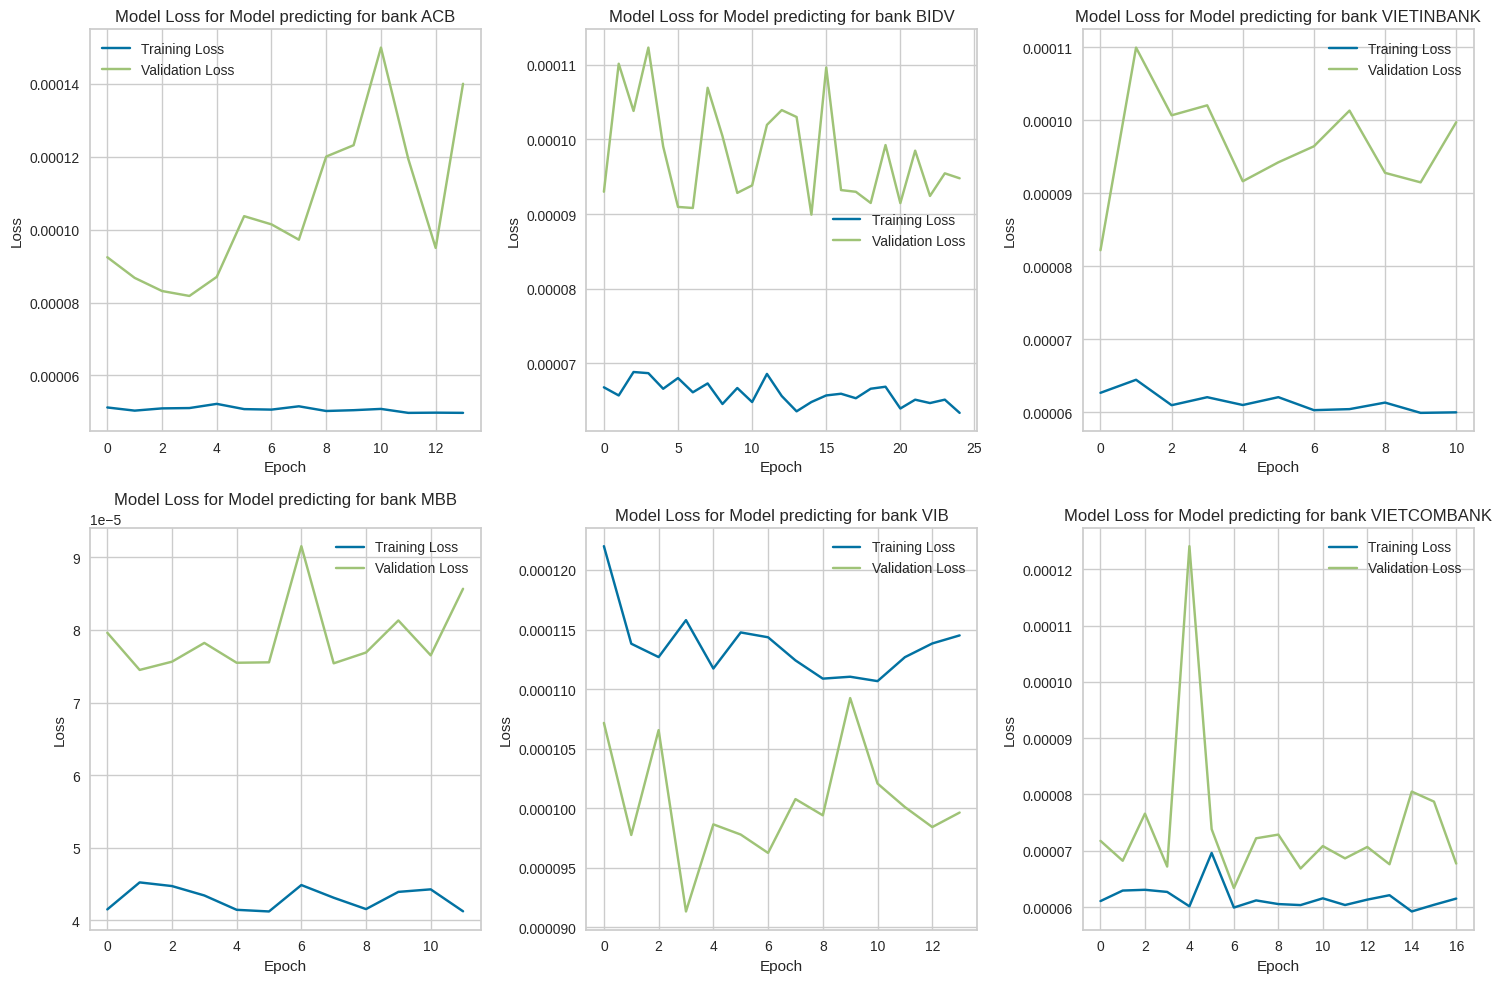

In [ ]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Loop through each history object
for i, history in enumerate(histories):
    # Calculate the subplot position
    row = i // 3
    col = i % 3

    # Plot the training and validation loss
    axs[row, col].plot(history.history['loss'], label = 'Training Loss')
    axs[row, col].plot(history.history['val_loss'], label = 'Validation Loss')
    axs[row, col].set_title('Model Loss for Model predicting for bank {}'.format(bank_names[i].upper()))
    axs[row, col].set_ylabel('Loss')
    axs[row, col].set_xlabel('Epoch')
    axs[row, col].legend()

# Display the plot
plt.tight_layout()
plt.show()

## <a class = "anchor" id = "6.3">_Model evaluation_</a>

<a class = "anchor" id = "6.3.1">**_Metrics_**</a>

Now, we have to evaluate the efficiency the model based on Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

In [ ]:
# Define the dataframe that would store the evaluation metrics
metrics_df = pd.DataFrame(index = ['MSE', 'RMSE'], columns = bank_names)

# Loop through 6 models
for model_name, X_train_name, Y_train_name, X_test_name, Y_pred_name, bank_name in zip(model_names, X_train_names, Y_train_names, X_test_names, Y_pred_names, bank_names):

    # Calculate error metrics
    mse_value = mean_squared_error(globals()[Y_test_name], globals()[Y_pred_name])
    rmse_value = np.sqrt(mse_value)

    # Store the results in the DataFrame
    metrics_df.loc['MSE', bank_name] = mse_value
    metrics_df.loc['RMSE', bank_name] = rmse_value

metrics_df

acb      bidv vietinbank       mbb       vib vietcombank
MSE   0.000161  0.000059   0.000164  0.000037  0.000057    0.000031
RMSE  0.012701  0.007672   0.012822  0.006097  0.007573    0.005542

The LSTM model appears to perform better on ACB and VIETCOMBANK datasets, with MSE values of 0.009694 and 0.008036, respectively, and RMSE values of 0.098459 and 0.089645, respectively. The model performs worst on VIETINBANK dataset, with an MSE value of 0.02437 and an RMSE value of 0.156108.

## <a class = "anchor" id = "6.5">*Plotting actual vs predicted line*</a>

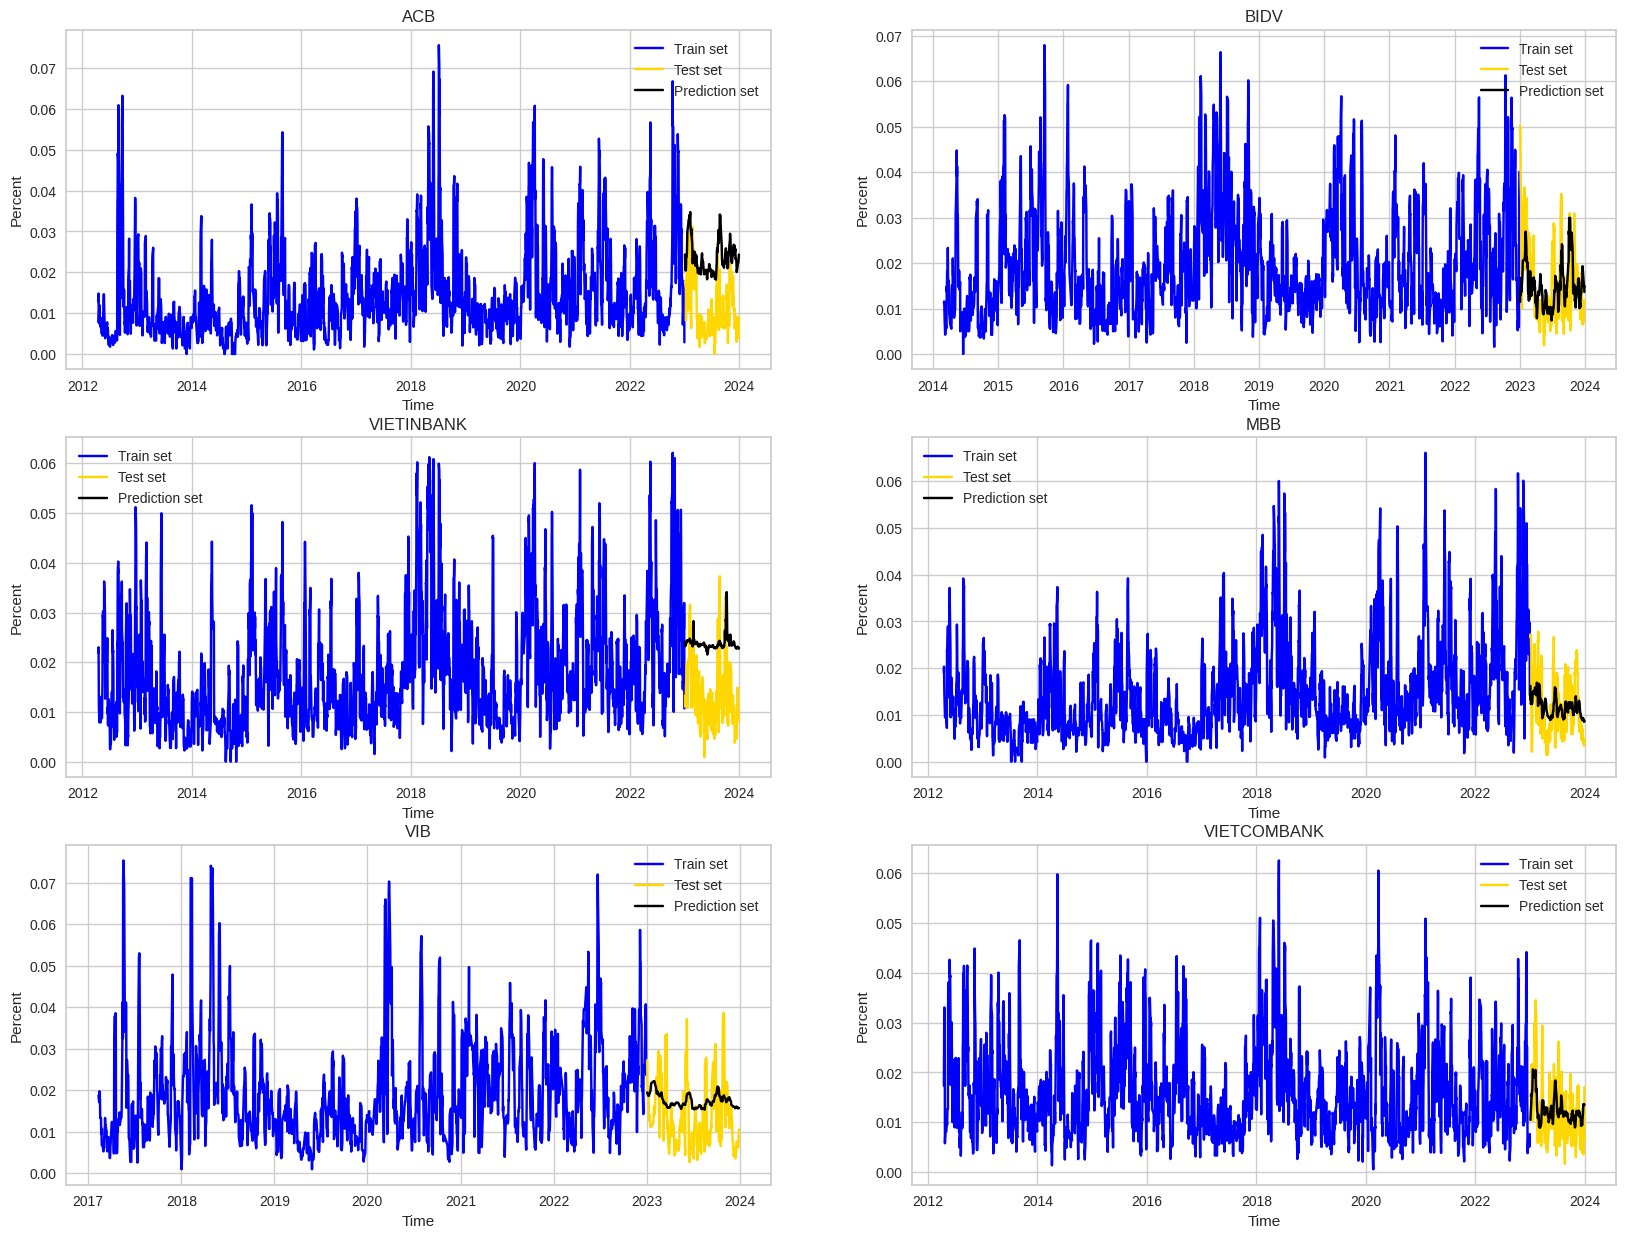

In [ ]:
fig, axs = plt.subplots(3, 2, figsize = (20, 15))
axs = axs.flatten()

for i, (bank_name, Y_test_name, Y_pred_name) in enumerate(zip(bank_names, Y_test_names, Y_pred_names)):

    axs[i].plot(
        globals()[bank_name].loc[globals()[bank_name]['time'] < split_date]['time'],
        globals()[bank_name].loc[globals()[bank_name]['time'] < split_date]['Realized volatility'],
        color = 'blue',
        label = 'Train set'
    )
    axs[i].plot(
        globals()[bank_name].loc[globals()[bank_name]['time'] >= split_date]['time'],
        globals()[Y_test_name],
        color = 'gold',
        label = 'Test set'
    )
    axs[i].plot(
        globals()[bank_name].loc[globals()[bank_name]['time'] >= split_date]['time'],
        globals()[Y_pred_name],
        color = 'black',
        label = 'Prediction set'
    )
    axs[i].set_title(f'{Y_test_name[7:].upper()}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Percent')
    axs[i].legend()

By looking at the graph above, we see that:
- LSTM model has depicted quite well the actual value of ACB bank data, because the black line fit quite well with the yellow line (test set)
- LSTM model also depicts the actual value of data of MB bank and BIDV bank quite well, although the efficiency is not equal to that of ACB bank.
- LSTM model has depicted relatively well with Vietcombank's data, however we see that stock price volatility does not fluctuate too much compared to reality. However, the pattern of the prediction set is quite similar to the test set, so we can evaluate that the LSTM model is quite consistent with Vietcombank data.
- For the remaining two banks (VIB Bank and Vietinbank), although the LSTM model also depicts the correct pattern of the data, the predicted value of stock price volatility is quite different from the actual value.

In general, LSTM model will be very suitable to predict stock price volatility for ACB bank, quite suitable to predict stock price volatility for MB & BIDV & Vietcombank banks, and not too suitable to predict stock price volatility for banks. VIB Bank and Vietinbank.

# <a id = "7">**CONCLUSION**</a>

So far, we have analysed stocks data and implement linear regression model and LSTM model to predict stock price volatility based on close price and its lags together with Bollinger bands. Here's our comparison about the 2 models:

## <a class = "anchor" id = "7.1">*Metrics*</a>

> ### **Linear Regression:**

We can see that the MSE and RMSE of all 6 banks are very low, which can be inferred that Linear Regression does a great job in fitting the data. However, when we look closely at **Actual vs Predicted plot**, we see that the graph points are quite scattered and do not focus on the fitting line. This can be explained by the relatively low **R-squared** coefficient, showing that the Linear Regression model cannot fully describe the meaning of banks' data.

> ### **LSTM Model:**

Similarly, the MSE and RMSE of all 6 banks are very low, which can indicate that the LSTM model also does a great job in fitting the data. However, this comes because the value of data points are quite small, so the values ​​of MSE and RMSE are quite low.

> ### **Compare:**

We see that:
- For 5 banks ACB, BIDV, Vietinbank, MB and VIB, the MSE and RMSE index of Linear Regression model is smaller than that of LSTM model, which shows that Linear Regression model will be more suitable in predicting stock price volatility .
- In the case of Vietcombank only, the MSE and RMSE indexes of the Linear Regression model are larger than those of the LSTM model, which shows that the LSTM model will be better in predicting stock price volatility.

## <a class = "anchor" id = "7.2">*Actual vs Predicted*</a>

> ### **Linear Regression:**

We see that, between test set and prediction set:
- ACB Bank has a very high matching rate
- MB Bank has a fairly high matching rate
- BIDV, Vietinbank and Vietcombank have average matching
- VIB bank's matching rate is not too high.

> ### **LSTM Model:**

And for LSTM model, between test set and prediction set:
- ACB Bank has a very high matching rate
- MB Bank has a fairly high matching rate
- BIDV and Vietcombank have average matching
- VIB and Vietinbank have low matching.

> ### **Compare:**

Thereby, we can see that Linear Regression can describe and match data better than LSTM model for Vietinbank data. For VIB bank, it seems that both models are not suitable. As for ACB, MB Bank and BIDV, the Linear Regression model has slightly better performance than the LSTM model, but the performance difference is not large. As for Vietcombank, the performance of both models is the same.

## *Final words*

Summing up, we conclude that:
- Linear Regression model is much more suitable for LSTM for Vietinbank data.
- Linear Regression model slightly better LSTM for MB and BIDV bank data.
- Linear Regression model and LSTM have equivalent performance for ACB bank data.
- Linear Regression model slightly worse LSTM for Vietcombank data.
- Linear Regression model and LSTM are not suitable for VIB bank data

Of course, this report still has some limitations. First, we have not tested many other models such as ARIMA, SARIMAX for time-series data; ARCH and GARCH models to predict stock price volatility, etc. Second, we have omitted the use of many other technical parameters such as 10-day moving average, 50-day moving average, MACD, etc. Finally, because the data we use includes a total of 6 datasets of 6 banks, during the training process, certain errors may have occurred. These will be limitations that future researchers can take advantage of and overcome.

# <a id = "8">**REFERENCES**</a>

B, N. B. H. (2020, January 10). Sử dụng mạng LSTM (Long Short Term Memory) để dự đoán cổ phiếu. Viblo. https://viblo.asia/s/su-dung-mang-lstm-long-short-term-memory-de-du-doan-co-phieu-24lJDz06KPM

Brownlee, J. (2022) Difference between a batch and an epoch in a neural network. https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/.

DauThau.info - Siêu phần mềm phân tích và săn tin thầu. (n.d.). Tra cứu ngành hàng theo mã ICB. DauThau.info - Siêu Phần Mềm Phân Tích Và Săn Tin Thầu. https://dauthau.asia/icb-industry/?collapse=3#:~:text=ICB%20(Industry%20classification%20benchmark)%3A,v%C3%A0%20114%20ph%C3%A2n%20ng%C3%A0nh%20nh%E1%BB%8F.

Fernando, J. (2023, March 31). Moving Average (MA): purpose, uses, formula, and examples. Investopedia. https://www.investopedia.com/terms/m/movingaverage.asp

GeeksforGeeks. (2019, August 23). Activation functions. https://www.geeksforgeeks.org/activation-functions/

Hà T. (2023, December 15). Forbes: 6 ngân hàng niêm yết tốt nhất Việt Nam 3 năm liền là ai? Nhịp Sống Kinh Tế Việt Nam & Thế Giới. https://vneconomy.vn/forbes-6-ngan-hang-niem-yet-tot-nhat-viet-nam-3-nam-lien-la-ai.htm#:~:text=%C4%90%E1%BA%A7u%20th%C3%A1ng%206%20v%E1%BB%ABa%20qua,%2C%20MBBank%2C%20BIDV%20v%C3%A0%20VietinBank.

Hayes, A. (2021, December 25). What is a stock ticker? Definition, how they work, and origins. Investopedia. https://www.investopedia.com/ask/answers/12/what-is-a-stock-ticker.asp

Moving Averages - Simple and exponential [ChartSchool]. (n.d.). https://school.stockcharts.com/doku.php?id=technical_indicators:moving_averages

Phong, T. (2022, September 26). LSTM là gì? Ứng dụng dự đoán giá cổ phiếu. Triệu Phong Blog. https://www.nguyentrieuphong.com/2021/07/LSTM-RNN-du-doan-co-phieu-.html

Praharsha, V. (2022, January 2). RELU (Rectified Linear Unit) activation function. OpenGenus IQ: Computing Expertise & Legacy. https://iq.opengenus.org/relu-activation/

Ryanholbrook. (2023, April 20). Overfitting and underfitting. Kaggle. https://www.kaggle.com/code/ryanholbrook/overfitting-and-underfitting

Taylor, S. (2023, November 21). Multiple Linear regression. Corporate Finance Institute. https://corporatefinanceinstitute.com/resources/data-science/multiple-linear-regression/

Understanding Residual Plots in Linear Regression Models: A Comprehensive Guide with Examples | by Nilimesh Halder, PhD - Freedium. (n.d.). https://freedium.cfd/https://medium.com/@HalderNilimesh/understanding-residual-plots-in-linear-regression-models-a-comprehensive-guide-with-examples-2fb5a60daf26

VietNamNet News. (n.d.). VinFast lên sàn chứng khoán Mỹ: Thương hiệu Việt lan tỏa thế giới. VietNamNet News. https://vietnamnet.vn/vinfast-len-san-chung-khoan-my-thuong-hieu-viet-lan-toa-the-gioi-2189377.html#:~:text=L%C3%BAc%2020%20t%E1%BB%91i%20ng%C3%A0y%2015,tr%C3%AAn%20s%C3%A0n%20ch%E1%BB%A9ng%20kho%C3%A1n%20M%E1%BB%B9.

Vai trò của thị trường chứng khoán đối với nền kinh tế Việt Nam. (n.d.). https://fiingroup.vn/NewsInsights/Detail/5555358?lang=vi-
